<center>
    <img src="https://github.com/sinaaghaee/ProcessMiningProject-CustomerBehaviorAnalysis/blob/main/Images/Sharif_Logo.png?raw=true" width="250"   />
</center>

# Data-Driven Decison-Making Project - Rainfall Prediction

 ## Course Info:
 
 **Student/Analyst:**  Sina Aghaee <br>
 **Course:** Data-Driven Decison-Making 1399-1400 <br>
 **Institution:** Sharif University of Technology, Department of Industrial Engineering <br>
 **Instructor:**  Dr. Nafiseh Sedghi 


## Introduction
 

In [44]:
# Turning off the warnings
options(warn=-1)

# Changing the default size of the plots we are going to draw
options(repr.plot.width=15, repr.plot.height=8)

# Importing required libraries
library(ggplot2)
library(naniar)
library(plyr)
library(rpart)
library(rpart.plot)
library(caret)
library(e1071)
library(lattice)
library(randomForest

In [2]:
# EDA Analysis
weather <- read.csv('weatherAUS.csv')
weather$Date <- as.Date(weather$Date)
str(weather

'data.frame':	145460 obs. of  23 variables:
 $ Date         : Date, format: "2008-12-01" "2008-12-02" ...
 $ Location     : chr  "Albury" "Albury" "Albury" "Albury" ...
 $ MinTemp      : num  13.4 7.4 12.9 9.2 17.5 14.6 14.3 7.7 9.7 13.1 ...
 $ MaxTemp      : num  22.9 25.1 25.7 28 32.3 29.7 25 26.7 31.9 30.1 ...
 $ Rainfall     : num  0.6 0 0 0 1 0.2 0 0 0 1.4 ...
 $ Evaporation  : num  NA NA NA NA NA NA NA NA NA NA ...
 $ Sunshine     : num  NA NA NA NA NA NA NA NA NA NA ...
 $ WindGustDir  : chr  "W" "WNW" "WSW" "NE" ...
 $ WindGustSpeed: int  44 44 46 24 41 56 50 35 80 28 ...
 $ WindDir9am   : chr  "W" "NNW" "W" "SE" ...
 $ WindDir3pm   : chr  "WNW" "WSW" "WSW" "E" ...
 $ WindSpeed9am : int  20 4 19 11 7 19 20 6 7 15 ...
 $ WindSpeed3pm : int  24 22 26 9 20 24 24 17 28 11 ...
 $ Humidity9am  : int  71 44 38 45 82 55 49 48 42 58 ...
 $ Humidity3pm  : int  22 25 30 16 33 23 19 19 9 27 ...
 $ Pressure9am  : num  1008 1011 1008 1018 1011 ...
 $ Pressure3pm  : num  1007 1008 1009 1013 1

In [3]:
summary(weather)

      Date              Location            MinTemp         MaxTemp     
 Min.   :2007-11-01   Length:145460      Min.   :-8.50   Min.   :-4.80  
 1st Qu.:2011-01-11   Class :character   1st Qu.: 7.60   1st Qu.:17.90  
 Median :2013-06-02   Mode  :character   Median :12.00   Median :22.60  
 Mean   :2013-04-04                      Mean   :12.19   Mean   :23.22  
 3rd Qu.:2015-06-14                      3rd Qu.:16.90   3rd Qu.:28.20  
 Max.   :2017-06-25                      Max.   :33.90   Max.   :48.10  
                                         NA's   :1485    NA's   :1261   
    Rainfall        Evaporation        Sunshine     WindGustDir       
 Min.   :  0.000   Min.   :  0.00   Min.   : 0.00   Length:145460     
 1st Qu.:  0.000   1st Qu.:  2.60   1st Qu.: 4.80   Class :character  
 Median :  0.000   Median :  4.80   Median : 8.40   Mode  :character  
 Mean   :  2.361   Mean   :  5.47   Mean   : 7.61                     
 3rd Qu.:  0.800   3rd Qu.:  7.40   3rd Qu.:10.60            

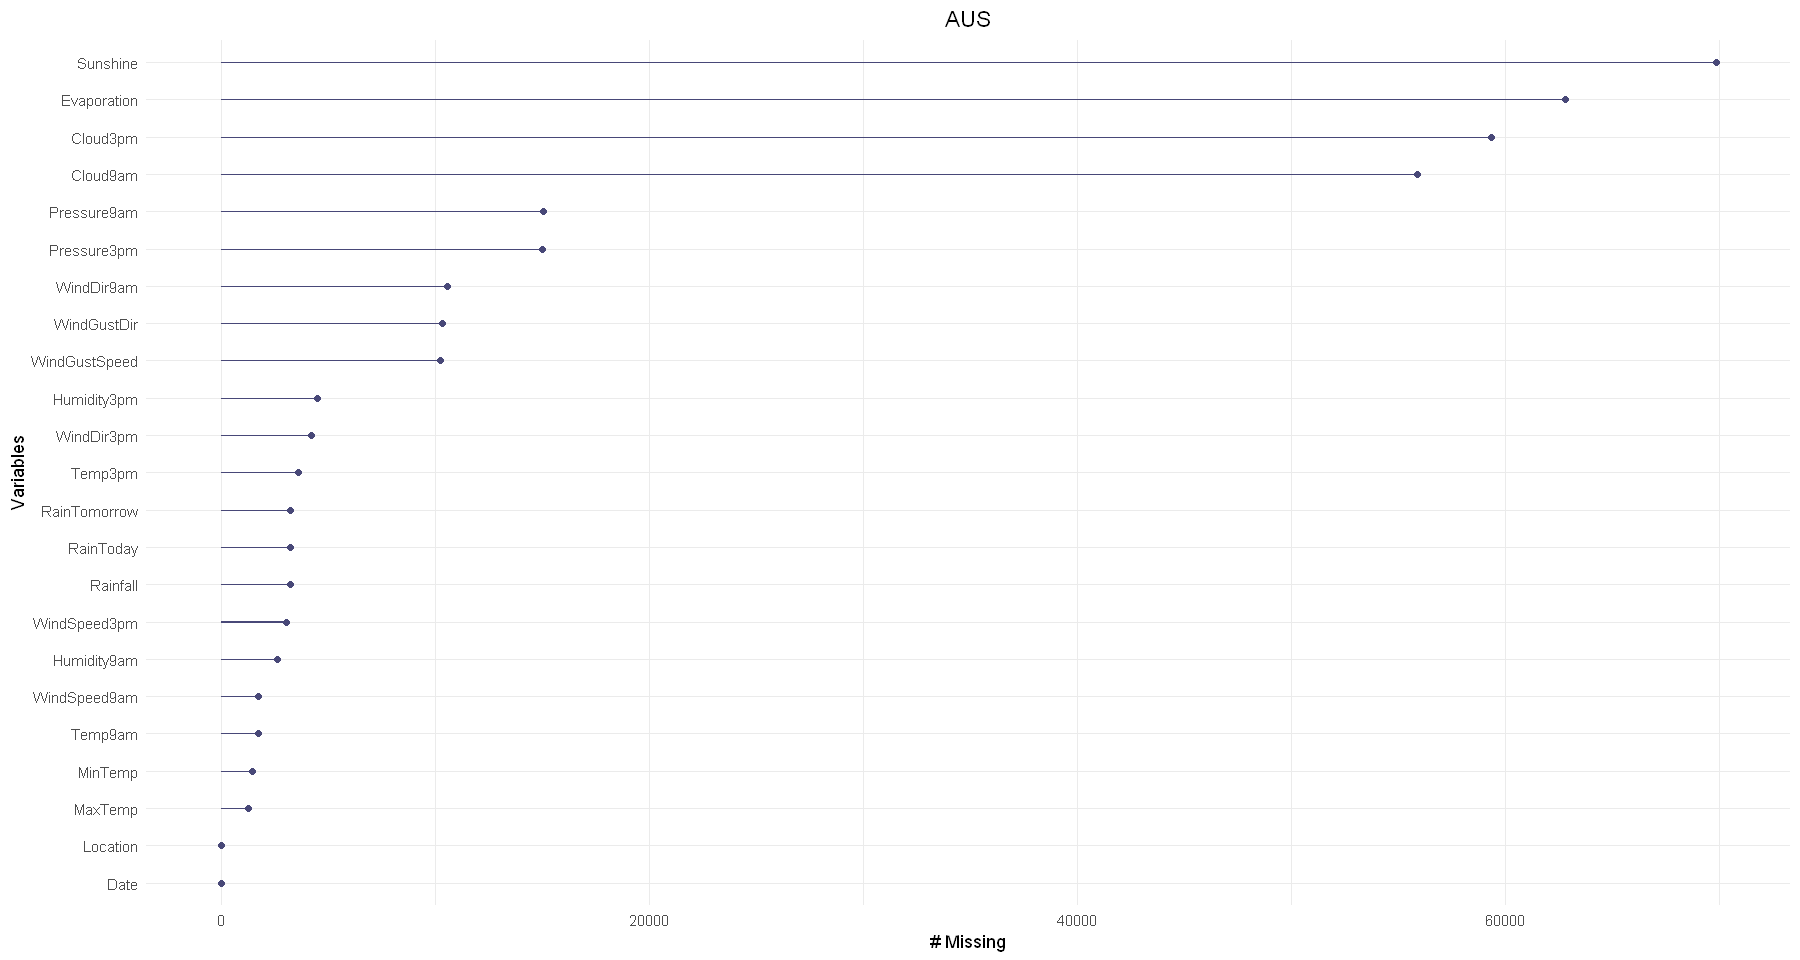

In [5]:
gg_miss_var(weather) + ggtitle("AUS")+ theme(plot.title = element_text(hjust =0.5))


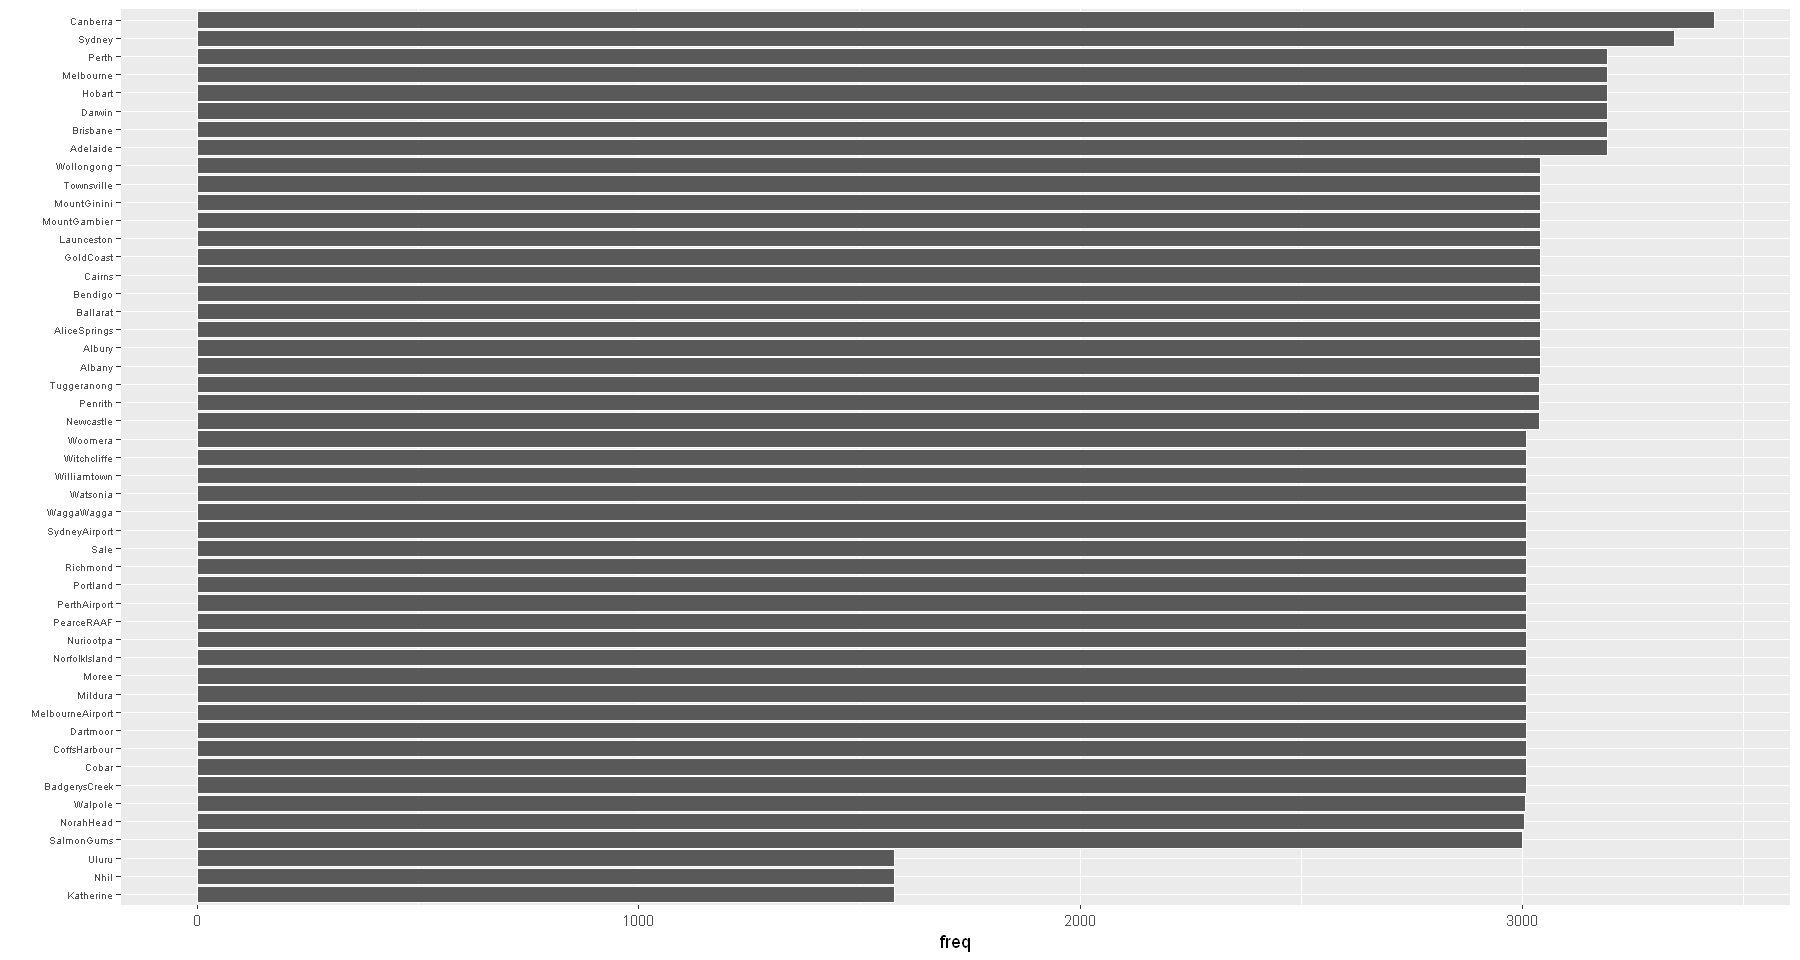

In [8]:
location_count <- count(weather, vars = "Location")
location_count$Location <- reorder(location_count$Location, location_count$freq)
ggplot(data= location_count, aes(x=freq , y= Location)) + geom_bar(stat="identity", color="white") + theme(axis.text.y = element_text(size=6)) + ylab("")


In [9]:
weather$RainTomorrow <- as.factor(weather$RainTomorrow)
weather$RainToday <- as.factor(weather$RainToday)
weather$Location <- as.factor(weather$Location)
weather$WindGustDir <- as.factor(weather$WindGustDir)
weather$WindDir9am <- as.factor(weather$WindDir9am)
weather$WindDir3pm <- as.factor(weather$WindDir3pm)

weather1 <- na.omit(weather)

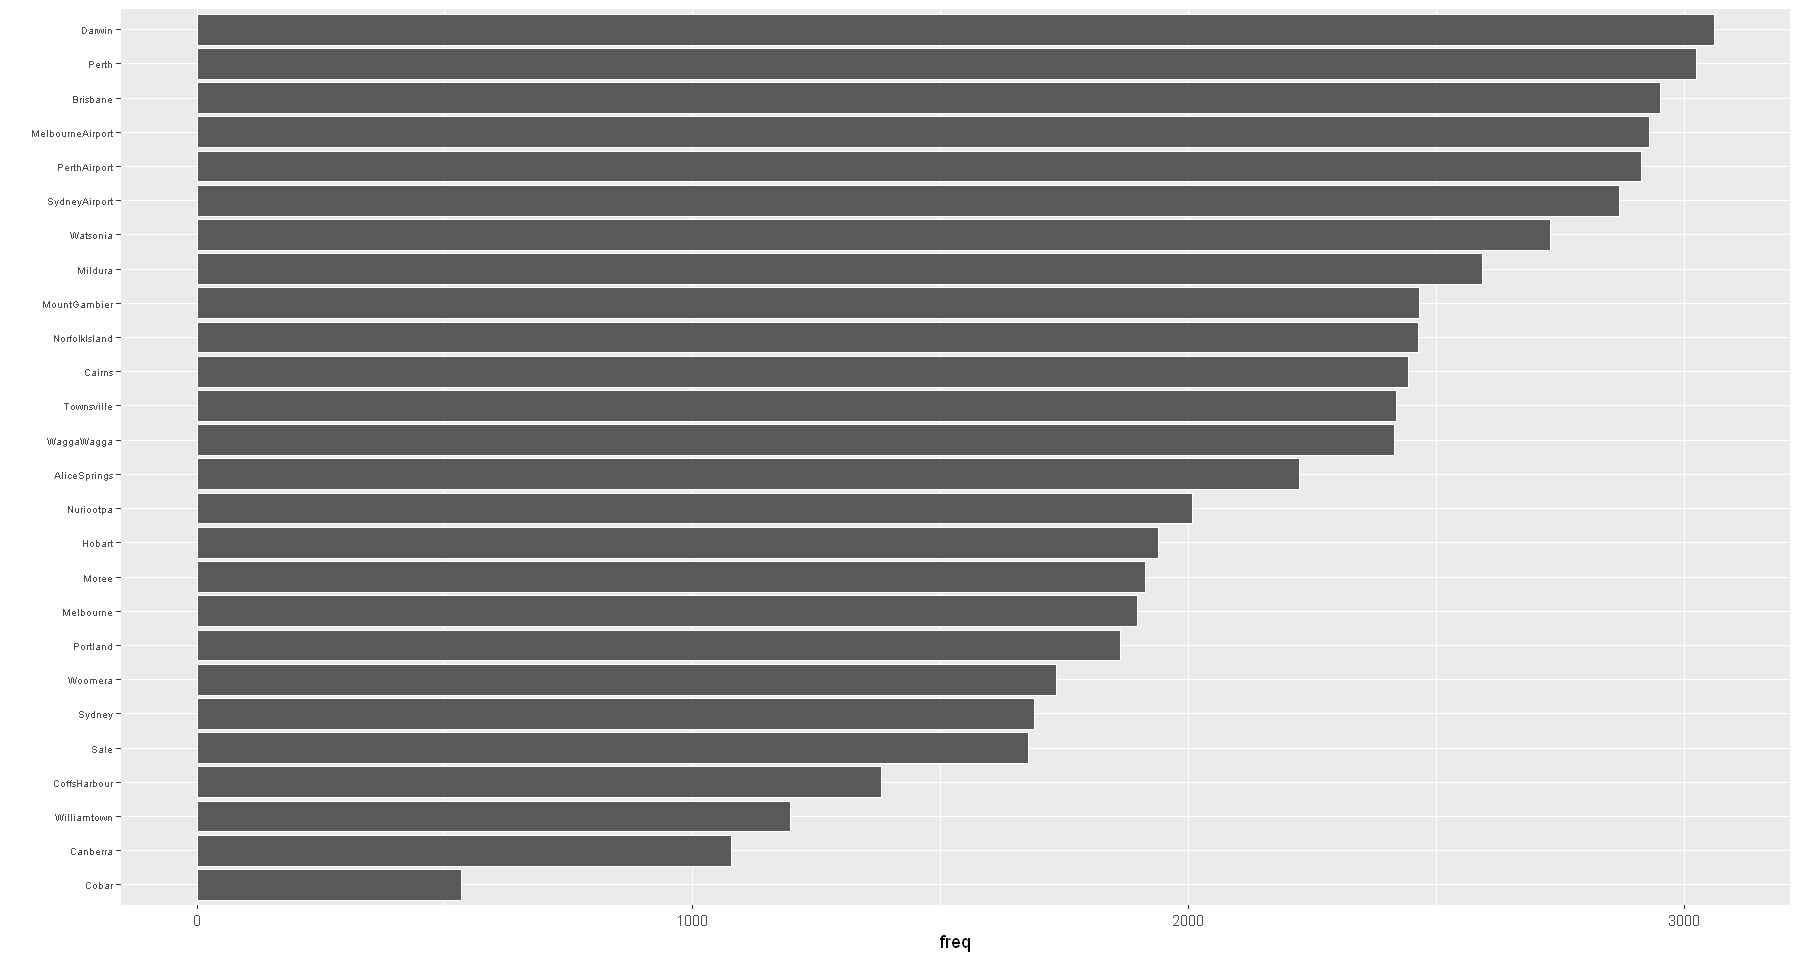

In [10]:
location_count1 <- count(weather1, vars = "Location")
location_count1$Location <- reorder(location_count1$Location, location_count1$freq)
ggplot(data= location_count1, aes(x=freq , y= Location)) + geom_bar(stat="identity", color="white") + theme(axis.text.y = element_text(size=6)) + ylab("")


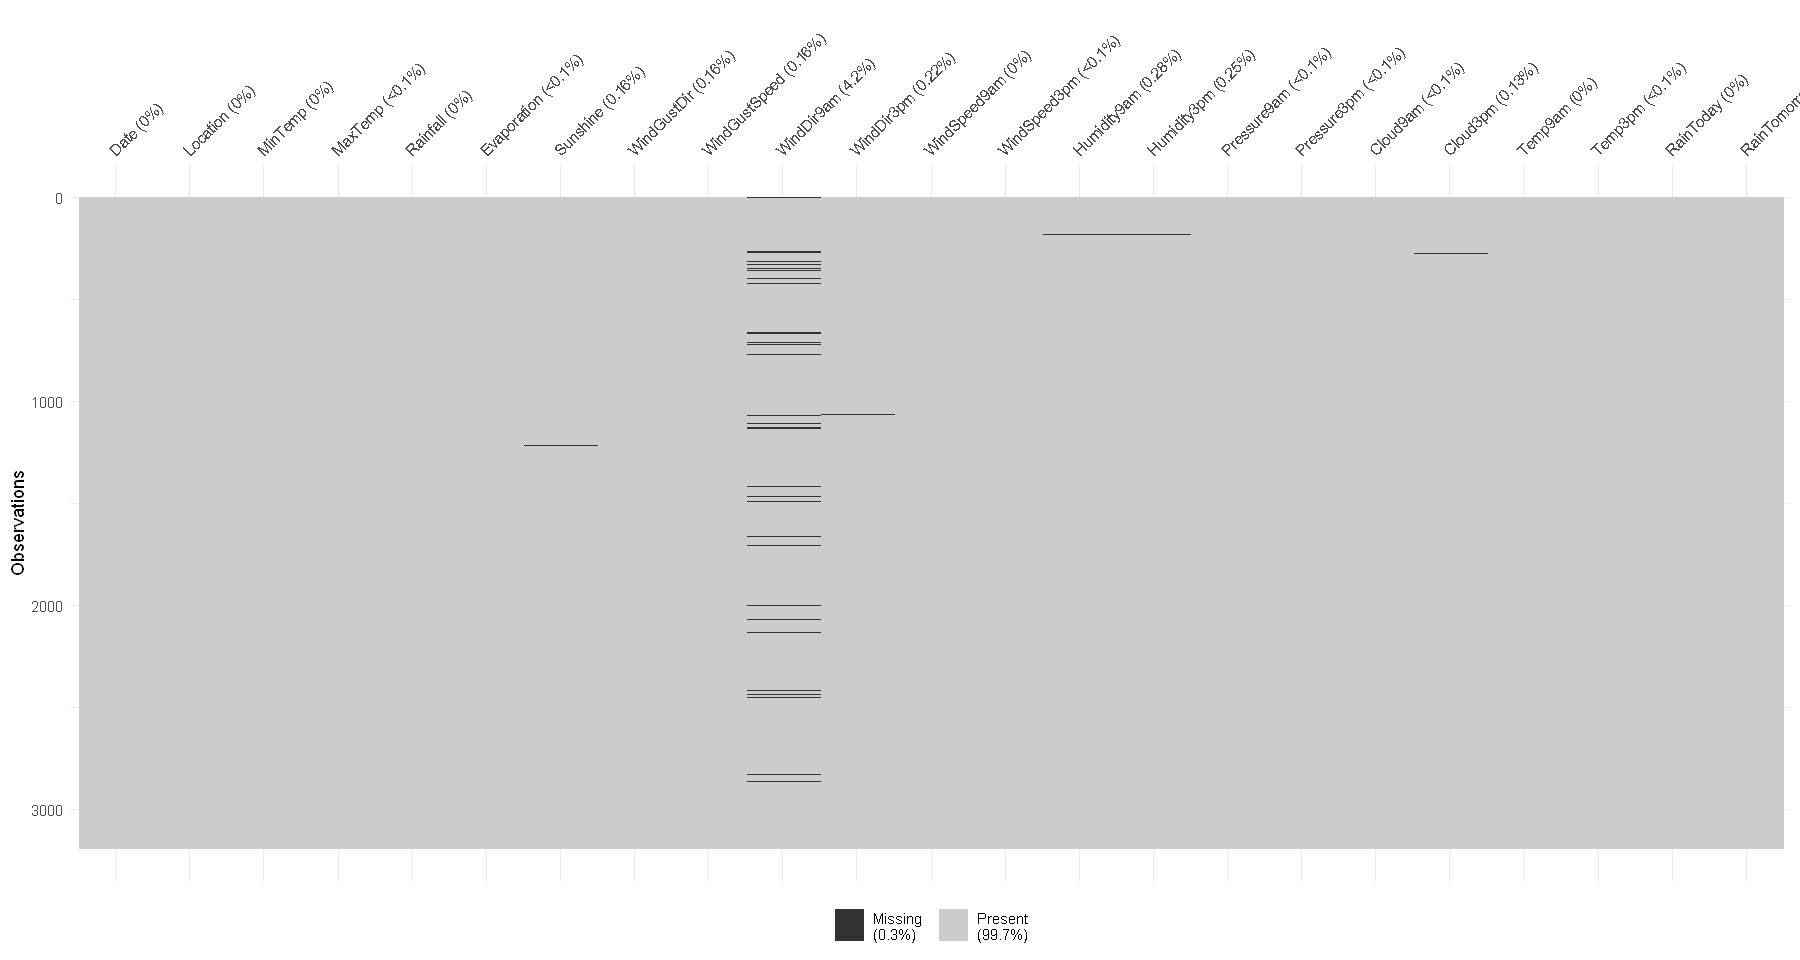

In [12]:
perth_withNA <- subset(weather, weather$Location == "Perth")
vis_miss(perth_withNA)

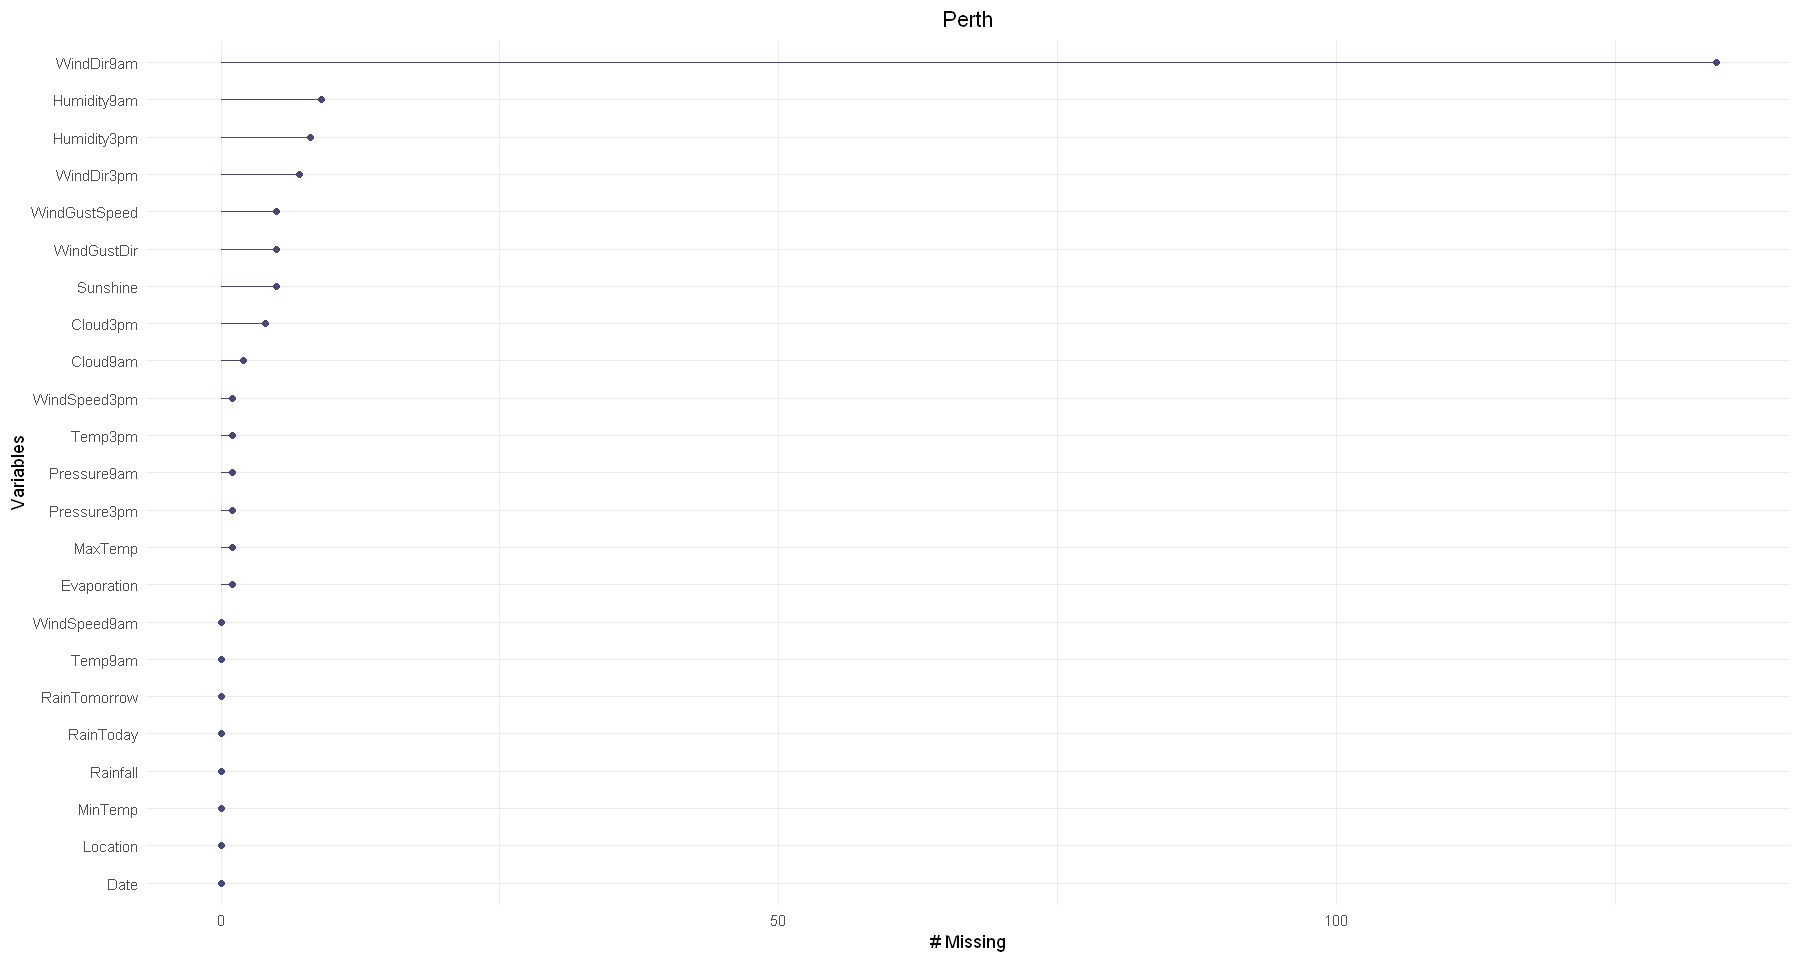

In [13]:
gg_miss_var(perth_withNA) + ggtitle("Perth")+ theme(plot.title = element_text(hjust =0.5))

In [14]:
perth <- na.omit(perth_withNA)

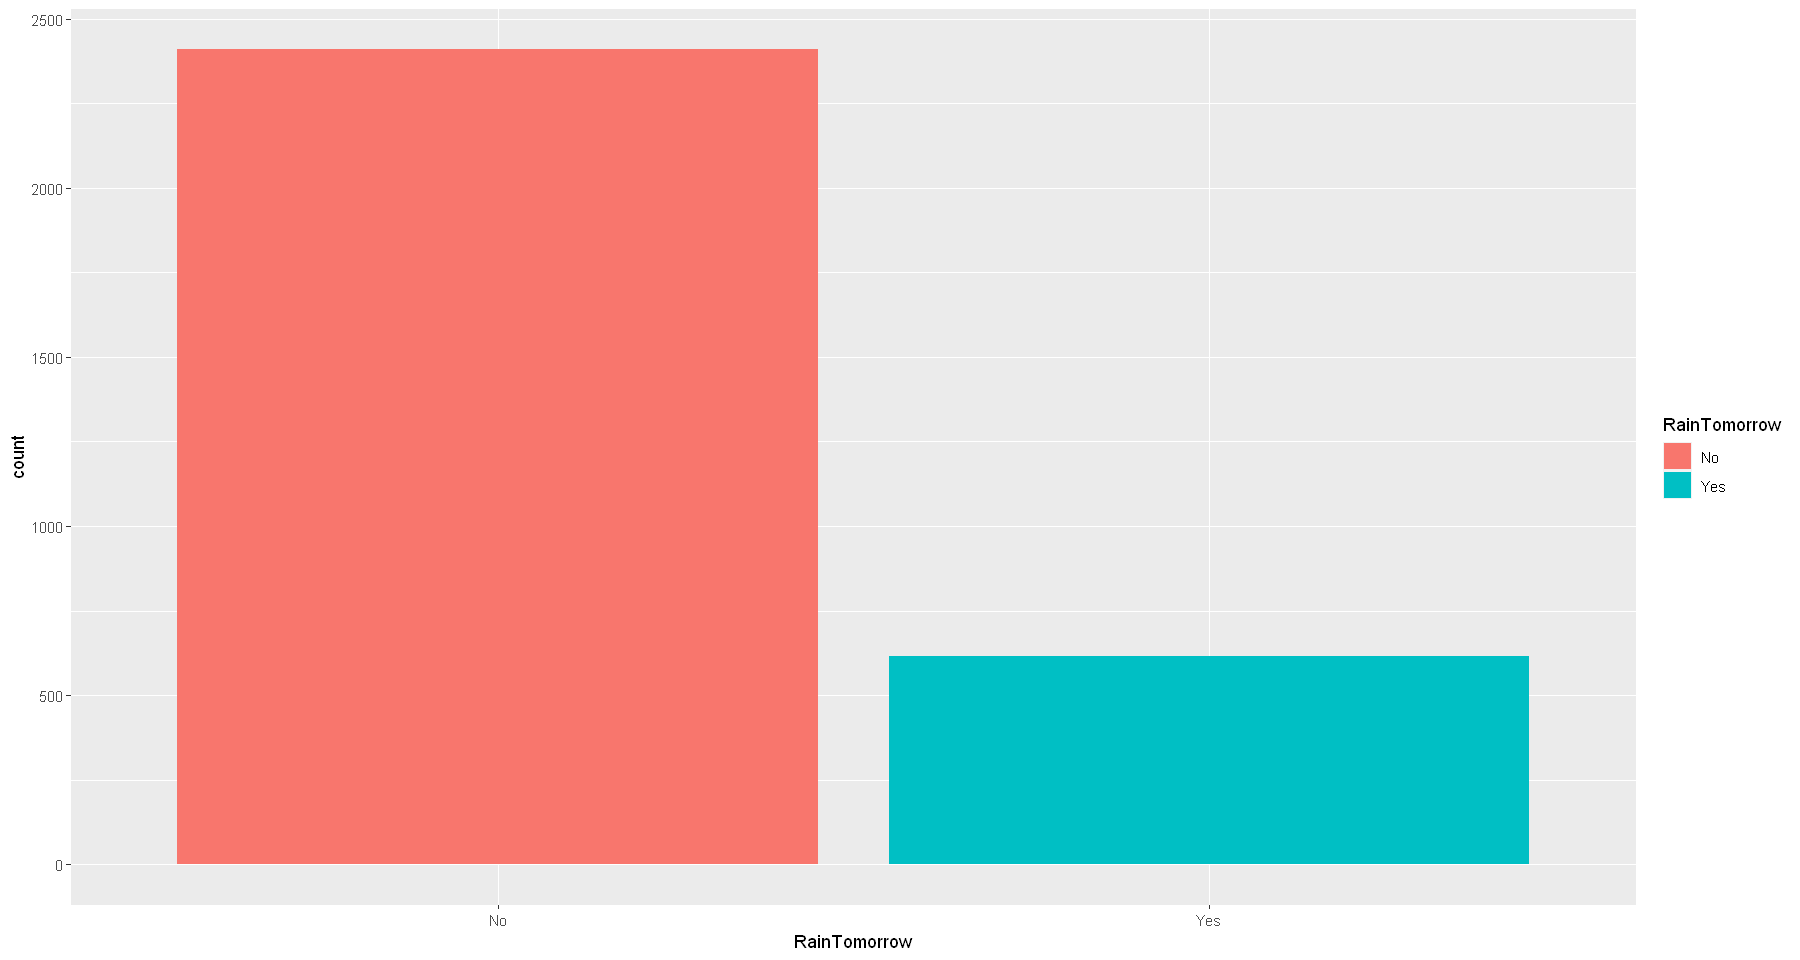

In [15]:
ggplot(perth, aes(x= RainTomorrow , fill = RainTomorrow )) + geom_histogram(stat="count")

In [16]:
table(perth$RainTomorrow)


  No  Yes 
2409  616 

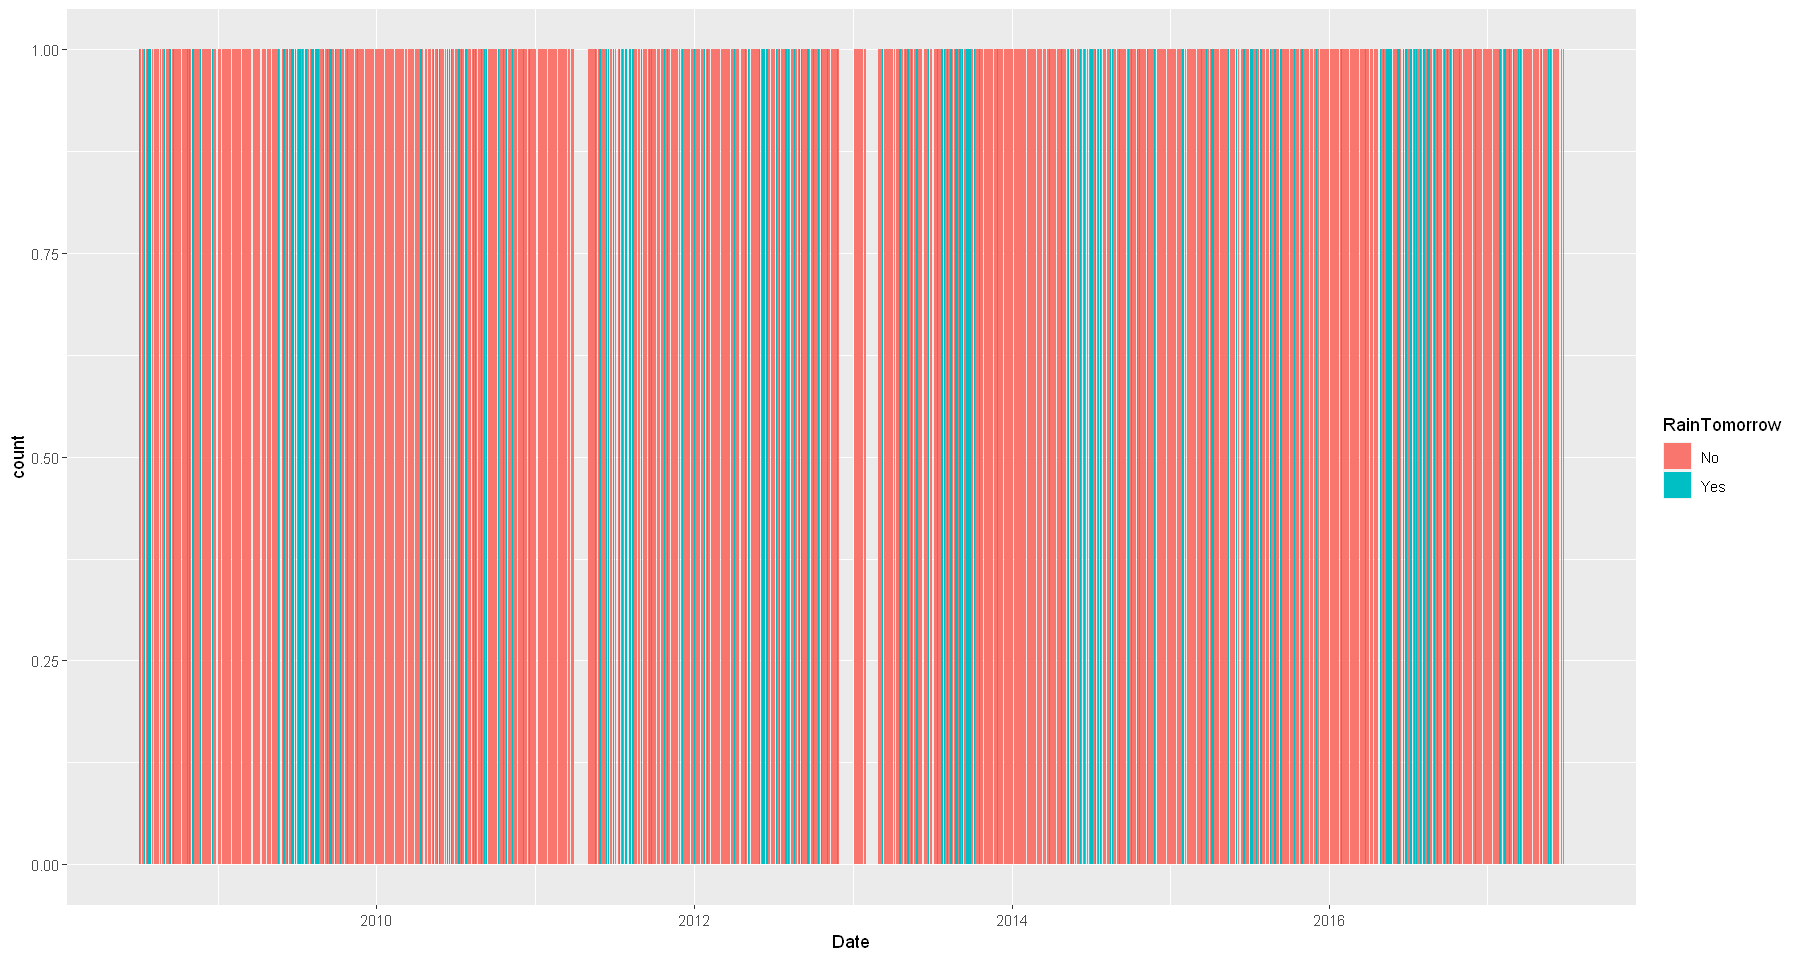

In [17]:
ggplot(perth, aes(x= Date , fill = RainTomorrow )) + geom_histogram(stat="count")

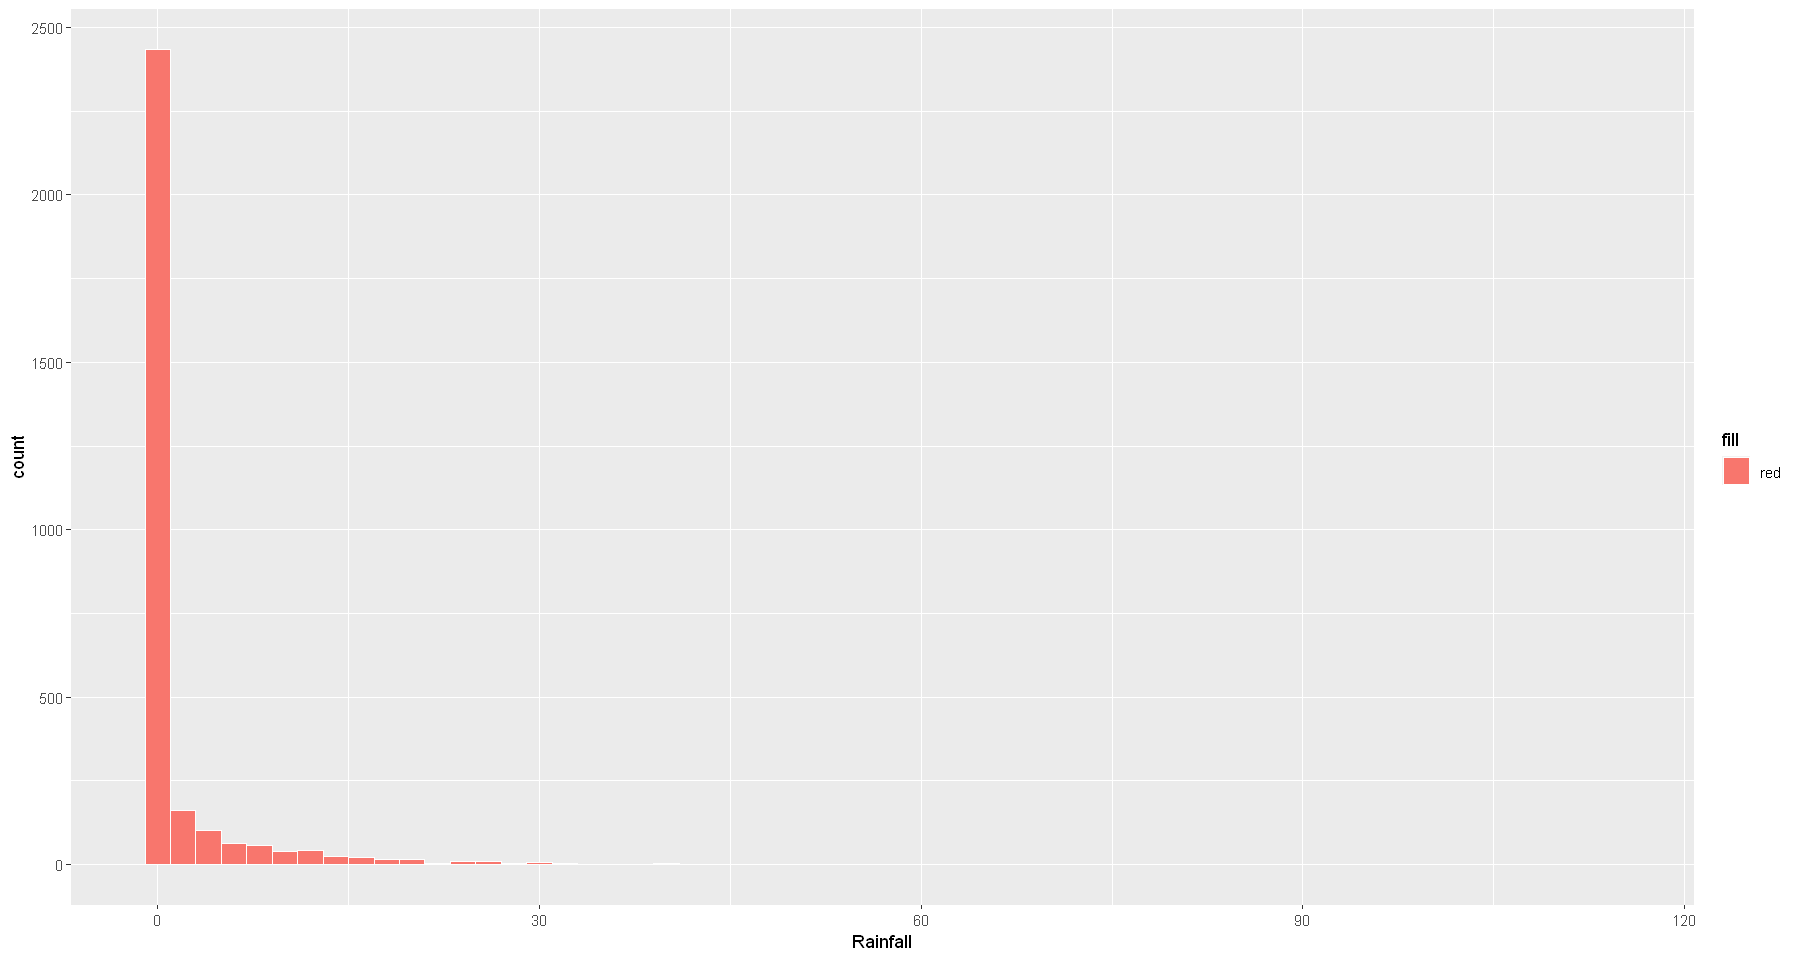

In [18]:
ggplot(perth, aes(x= Rainfall, fill = "red") ) + geom_histogram( binwidth = 2, color= "white") 

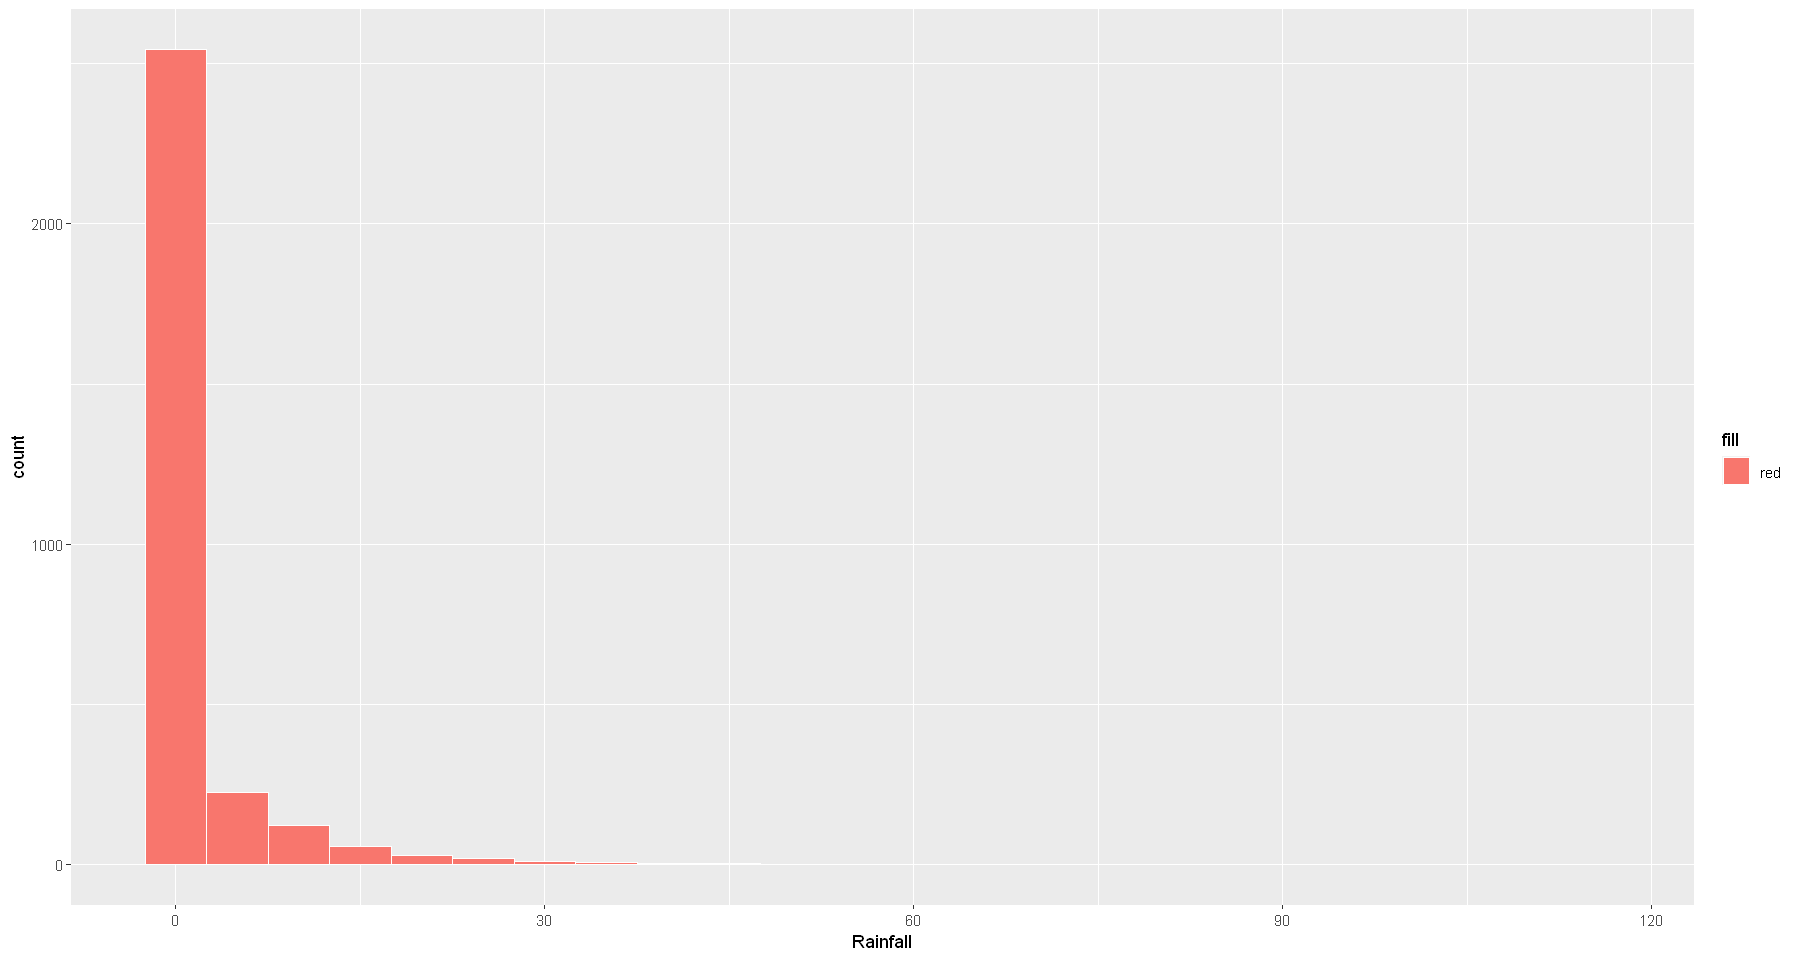

In [19]:
ggplot(perth, aes(x= Rainfall, fill = "red") ) + geom_histogram( bins = 5 , binwidth = 5, color= "white") 

In [20]:
########################################################################
# 1. Rain prediction
########################################################################


In [21]:
# Model Fitting

## Splitting Data set into Train and Test sets
library(caTools)
set.seed(1000)
split <- sample.split(perth$RainTomorrow, SplitRatio = 0.8)
ClTrain <- subset(perth, split==T,select = -c(Location))
ClTest <- subset(perth, split==F,select = -c(Location))

In [22]:
## Baseline Model
Baseline <- table(ClTest$RainTomorrow, ClTest$RainToday)
Baseline
sum(diag(Baseline))/nrow(ClTest)

     
       No Yes
  No  424  58
  Yes  62  61

[1] 0.8016529

In [23]:
## Feature Selection For logstic Regression Model
logmod <- glm(RainTomorrow ~. -Date , data= ClTrain, family = binomial)
summary(logmod)


Call:
glm(formula = RainTomorrow ~ . - Date, family = binomial, data = ClTrain)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.0834  -0.3082  -0.1371  -0.0549   3.3025  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)    200.030226  24.492982   8.167 3.17e-16 ***
MinTemp         -0.076823   0.053249  -1.443 0.149104    
MaxTemp          0.093565   0.089090   1.050 0.293609    
Rainfall         0.006958   0.017803   0.391 0.695927    
Evaporation     -0.003478   0.051379  -0.068 0.946034    
Sunshine        -0.234902   0.046930  -5.005 5.58e-07 ***
WindGustDirENE  -0.965990   0.718905  -1.344 0.179047    
WindGustDirESE  -0.092908   0.695693  -0.134 0.893761    
WindGustDirN    -0.069474   0.720858  -0.096 0.923221    
WindGustDirNE   -0.371626   0.605673  -0.614 0.539496    
WindGustDirNNE   0.102007   0.660313   0.154 0.877229    
WindGustDirNNW   0.254240   0.770583   0.330 0.741452    
WindGustDirNW    0.067752   0.659952

In [24]:
logmod1 <- glm(RainTomorrow ~. -Date -WindGustDir -WindDir9am - WindSpeed9am   , data= ClTrain, family = binomial)
summary(logmod1)



Call:
glm(formula = RainTomorrow ~ . - Date - WindGustDir - WindDir9am - 
    WindSpeed9am, family = binomial, data = ClTrain)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.9461  -0.3209  -0.1574  -0.0611   3.2378  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)   200.615380  23.611823   8.496  < 2e-16 ***
MinTemp        -0.113003   0.049326  -2.291 0.021968 *  
MaxTemp         0.088855   0.082549   1.076 0.281749    
Rainfall        0.004968   0.017413   0.285 0.775431    
Evaporation    -0.023192   0.049737  -0.466 0.641006    
Sunshine       -0.252487   0.044804  -5.635 1.75e-08 ***
WindGustSpeed   0.069424   0.013011   5.336 9.51e-08 ***
WindDir3pmENE   1.281020   0.764850   1.675 0.093961 .  
WindDir3pmESE   1.160746   0.816750   1.421 0.155265    
WindDir3pmN     2.325248   0.784299   2.965 0.003029 ** 
WindDir3pmNE    1.194277   0.807015   1.480 0.138908    
WindDir3pmNNE   1.728538   0.813338   2.125 0.033567 *  
Wi

In [25]:
logmod2 <- glm(RainTomorrow ~. -Date -WindGustDir -WindDir9am - WindSpeed9am -WindDir3pm   , data= ClTrain, family = binomial)
summary(logmod2)


Call:
glm(formula = RainTomorrow ~ . - Date - WindGustDir - WindDir9am - 
    WindSpeed9am - WindDir3pm, family = binomial, data = ClTrain)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.9017  -0.3784  -0.1877  -0.0702   3.2965  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)   235.211648  21.856854  10.761  < 2e-16 ***
MinTemp        -0.166411   0.045624  -3.647 0.000265 ***
MaxTemp         0.099885   0.078070   1.279 0.200747    
Rainfall       -0.008262   0.015409  -0.536 0.591831    
Evaporation    -0.126186   0.045360  -2.782 0.005404 ** 
Sunshine       -0.238270   0.041222  -5.780 7.47e-09 ***
WindGustSpeed   0.078597   0.012053   6.521 6.99e-11 ***
WindSpeed3pm   -0.013024   0.021774  -0.598 0.549744    
Humidity9am     0.004205   0.008935   0.471 0.637925    
Humidity3pm     0.053636   0.010576   5.072 3.94e-07 ***
Pressure9am     0.292978   0.061784   4.742 2.12e-06 ***
Pressure3pm    -0.527926   0.063428  -8.323  <

,MinTemp,Temp9am,MaxTemp,Temp3pm
MinTemp,1.0000000,0.8557934,0.7179862,0.6735978
Temp9am,0.8557934,1.0000000,0.8999983,0.8430766
MaxTemp,0.7179862,0.8999983,1.0000000,0.9770428
Temp3pm,0.6735978,0.8430766,0.9770428,1.0000000


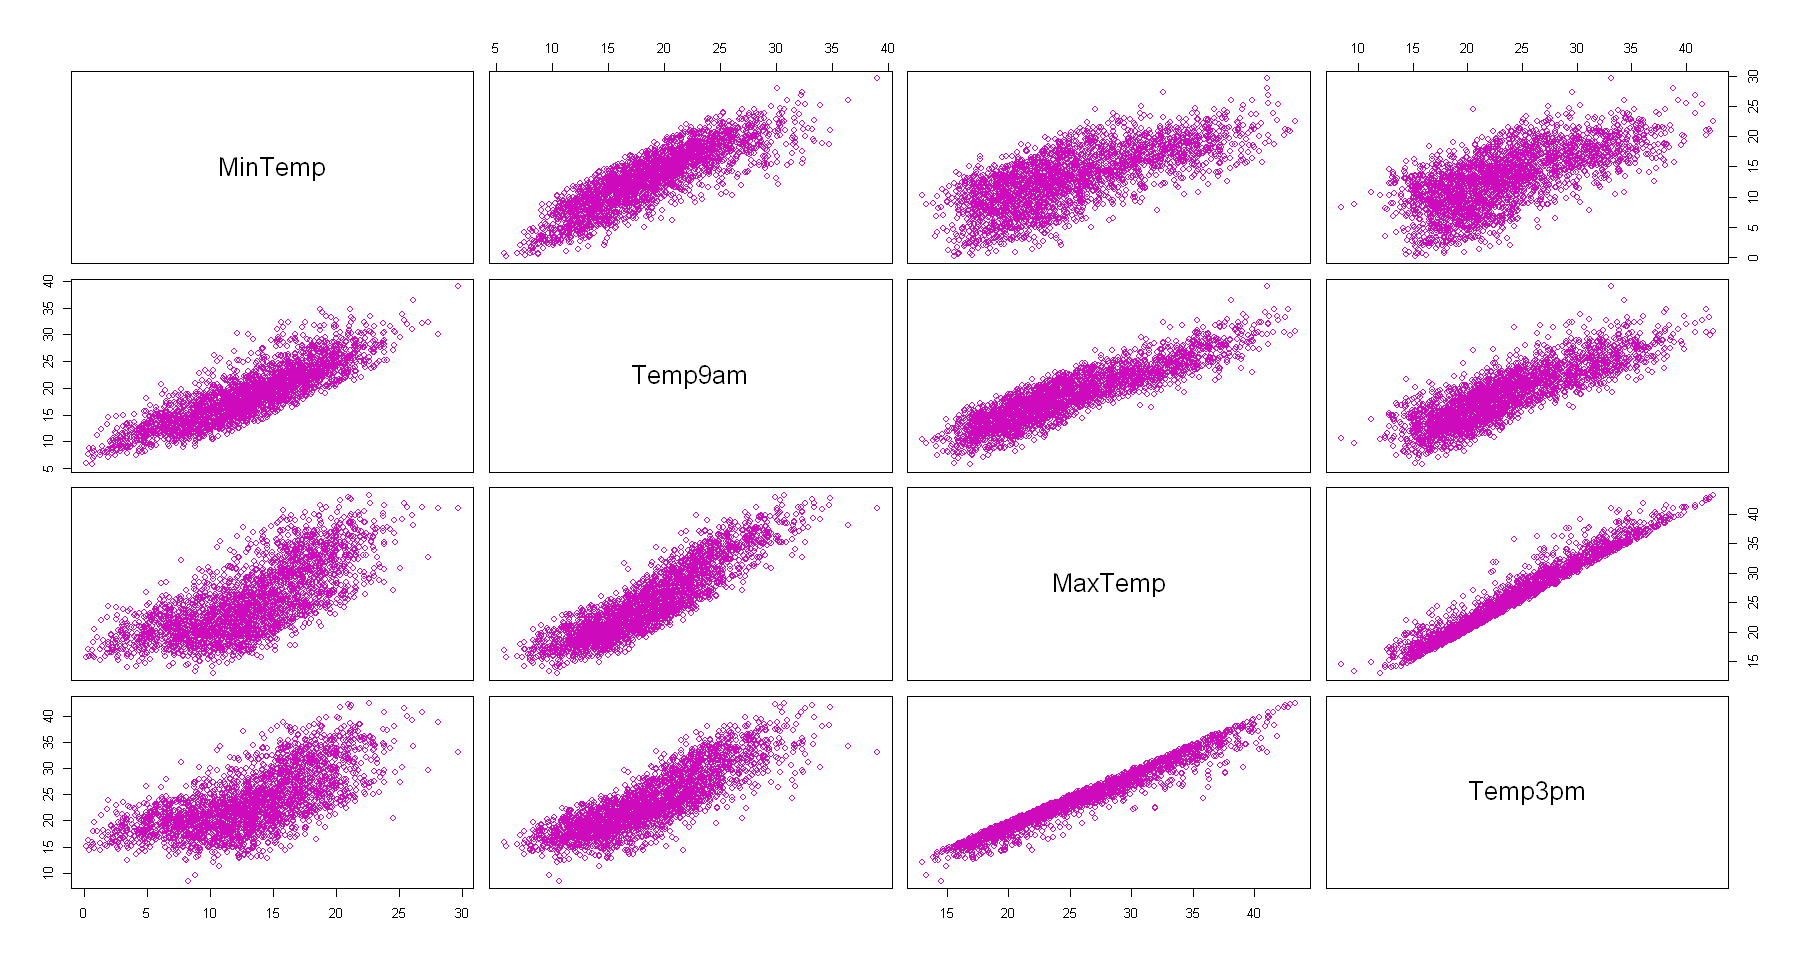

In [26]:
cor(ClTrain[,c("MinTemp","Temp9am","MaxTemp","Temp3pm")])
pairs(ClTrain[,c("MinTemp","Temp9am","MaxTemp","Temp3pm")], col = 14)

In [27]:
logmod3 <- glm(RainTomorrow ~. -Date -WindGustDir -WindDir9am - WindSpeed9am -WindDir3pm -Temp3pm -MaxTemp - Temp9am - Cloud9am, data= ClTrain, family = binomial)
summary(logmod3)


Call:
glm(formula = RainTomorrow ~ . - Date - WindGustDir - WindDir9am - 
    WindSpeed9am - WindDir3pm - Temp3pm - MaxTemp - Temp9am - 
    Cloud9am, family = binomial, data = ClTrain)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.9826  -0.3775  -0.1897  -0.0700   3.2592  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)   232.100022  20.974040  11.066  < 2e-16 ***
MinTemp        -0.189558   0.026303  -7.207 5.73e-13 ***
Rainfall       -0.007486   0.015479  -0.484  0.62866    
Evaporation    -0.117462   0.044245  -2.655  0.00793 ** 
Sunshine       -0.242698   0.035011  -6.932 4.15e-12 ***
WindGustSpeed   0.080682   0.011792   6.842 7.79e-12 ***
WindSpeed3pm   -0.010810   0.021292  -0.508  0.61166    
Humidity9am     0.003099   0.006978   0.444  0.65693    
Humidity3pm     0.060204   0.007668   7.852 4.10e-15 ***
Pressure9am     0.287511   0.055969   5.137 2.79e-07 ***
Pressure3pm    -0.519991   0.057054  -9.114  < 2e-16 ***


In [28]:
logmod4 <- glm(RainTomorrow ~. -Date -WindGustDir -WindDir9am - WindSpeed9am -WindDir3pm -Temp3pm -MaxTemp - Temp9am - Cloud9am - Rainfall - Humidity9am  - WindSpeed3pm, data= ClTrain, family = binomial)
summary(logmod4)


Call:
glm(formula = RainTomorrow ~ . - Date - WindGustDir - WindDir9am - 
    WindSpeed9am - WindDir3pm - Temp3pm - MaxTemp - Temp9am - 
    Cloud9am - Rainfall - Humidity9am - WindSpeed3pm, family = binomial, 
    data = ClTrain)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.9820  -0.3759  -0.1888  -0.0706   3.2477  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)   230.502776  20.784917  11.090  < 2e-16 ***
MinTemp        -0.189428   0.026258  -7.214 5.43e-13 ***
Evaporation    -0.121880   0.042950  -2.838 0.004543 ** 
Sunshine       -0.248573   0.033616  -7.394 1.42e-13 ***
WindGustSpeed   0.076235   0.009526   8.002 1.22e-15 ***
Humidity3pm     0.061262   0.007236   8.467  < 2e-16 ***
Pressure9am     0.295139   0.054974   5.369 7.93e-08 ***
Pressure3pm    -0.525856   0.056461  -9.314  < 2e-16 ***
Cloud3pm        0.095679   0.043014   2.224 0.026122 *  
RainTodayYes    0.703373   0.200218   3.513 0.000443 ***
---
Signif. 

,Pressure3pm,Pressure9am
Pressure3pm,1.0000000,0.9622503
Pressure9am,0.9622503,1.0000000


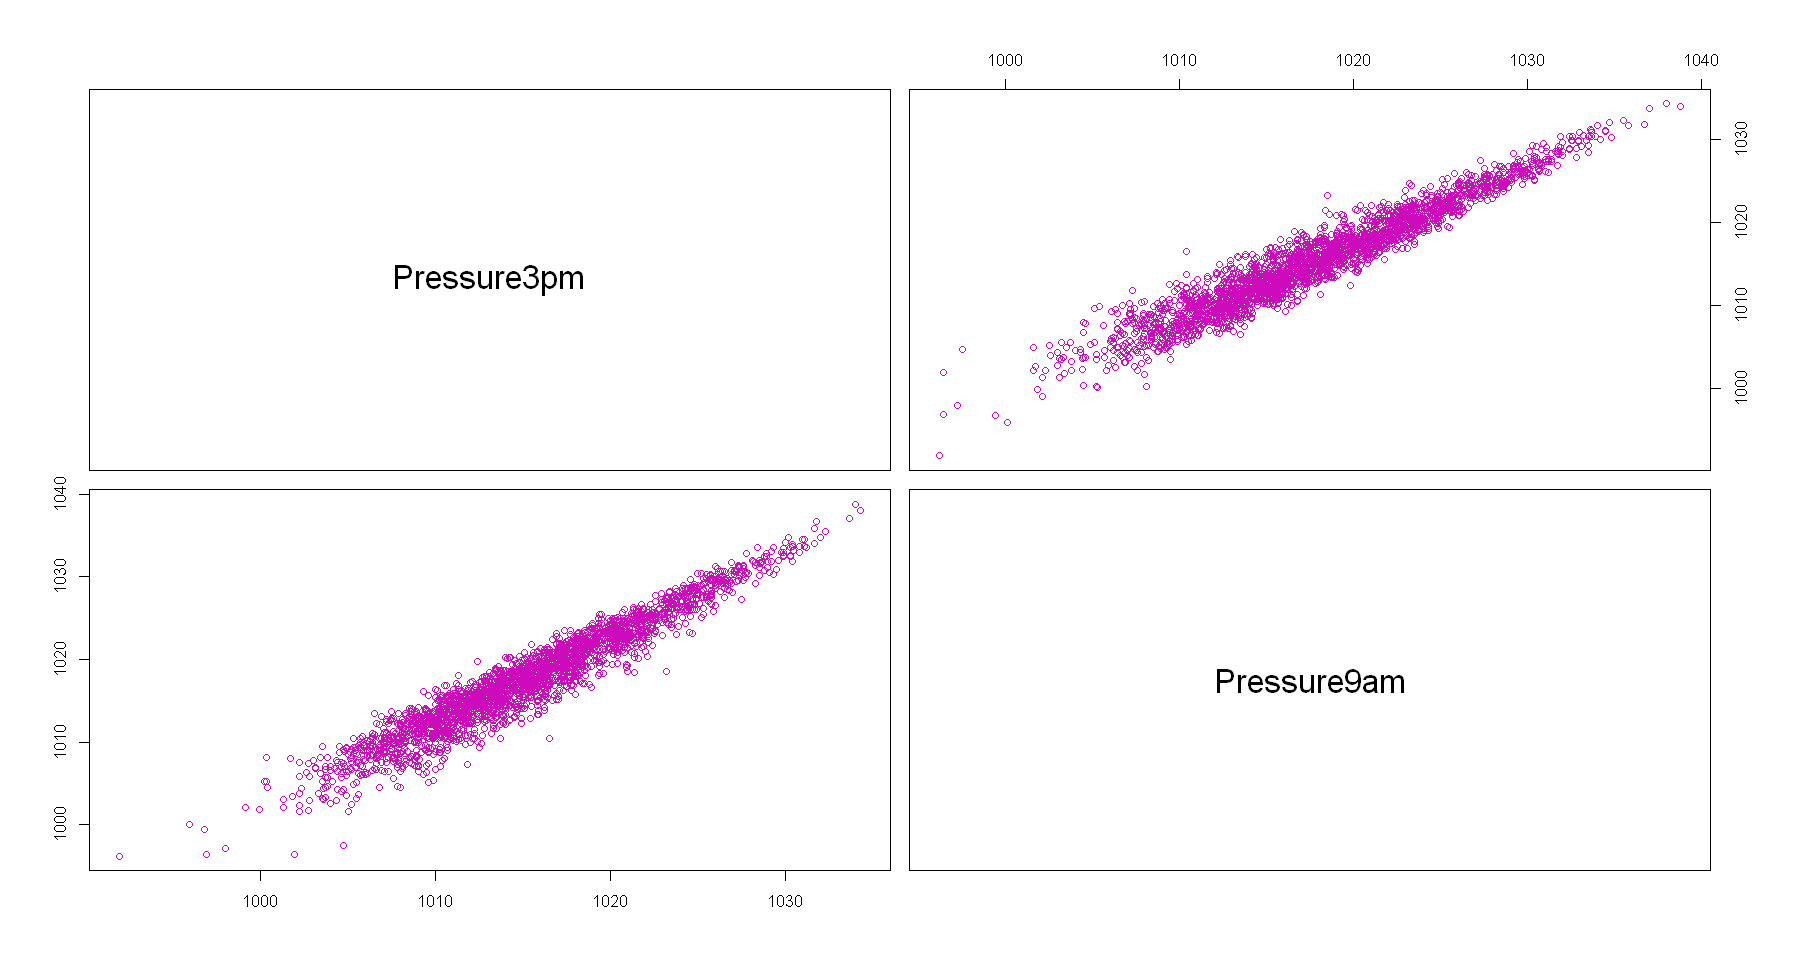

In [29]:
cor(ClTrain[,c("Pressure3pm","Pressure9am")])
pairs(ClTrain[,c("Pressure3pm","Pressure9am")], col = 14)

In [30]:
## Fitting logistic regression model
logmod4 <- glm(RainTomorrow ~. -Date -WindGustDir -WindDir9am - WindSpeed9am -WindDir3pm -Temp3pm -MaxTemp - Temp9am - Cloud9am - Rainfall - Humidity9am   - WindSpeed3pm  , data= ClTrain, family = binomial)
summary(logmod4)


Call:
glm(formula = RainTomorrow ~ . - Date - WindGustDir - WindDir9am - 
    WindSpeed9am - WindDir3pm - Temp3pm - MaxTemp - Temp9am - 
    Cloud9am - Rainfall - Humidity9am - WindSpeed3pm, family = binomial, 
    data = ClTrain)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.9820  -0.3759  -0.1888  -0.0706   3.2477  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)   230.502776  20.784917  11.090  < 2e-16 ***
MinTemp        -0.189428   0.026258  -7.214 5.43e-13 ***
Evaporation    -0.121880   0.042950  -2.838 0.004543 ** 
Sunshine       -0.248573   0.033616  -7.394 1.42e-13 ***
WindGustSpeed   0.076235   0.009526   8.002 1.22e-15 ***
Humidity3pm     0.061262   0.007236   8.467  < 2e-16 ***
Pressure9am     0.295139   0.054974   5.369 7.93e-08 ***
Pressure3pm    -0.525856   0.056461  -9.314  < 2e-16 ***
Cloud3pm        0.095679   0.043014   2.224 0.026122 *  
RainTodayYes    0.703373   0.200218   3.513 0.000443 ***
---
Signif. 

In [31]:
predicTrain <- predict(logmod4, type="response")
tapply(predicTrain, ClTrain$RainTomorrow, mean)

No        Yes 
0.09124352 0.64335443

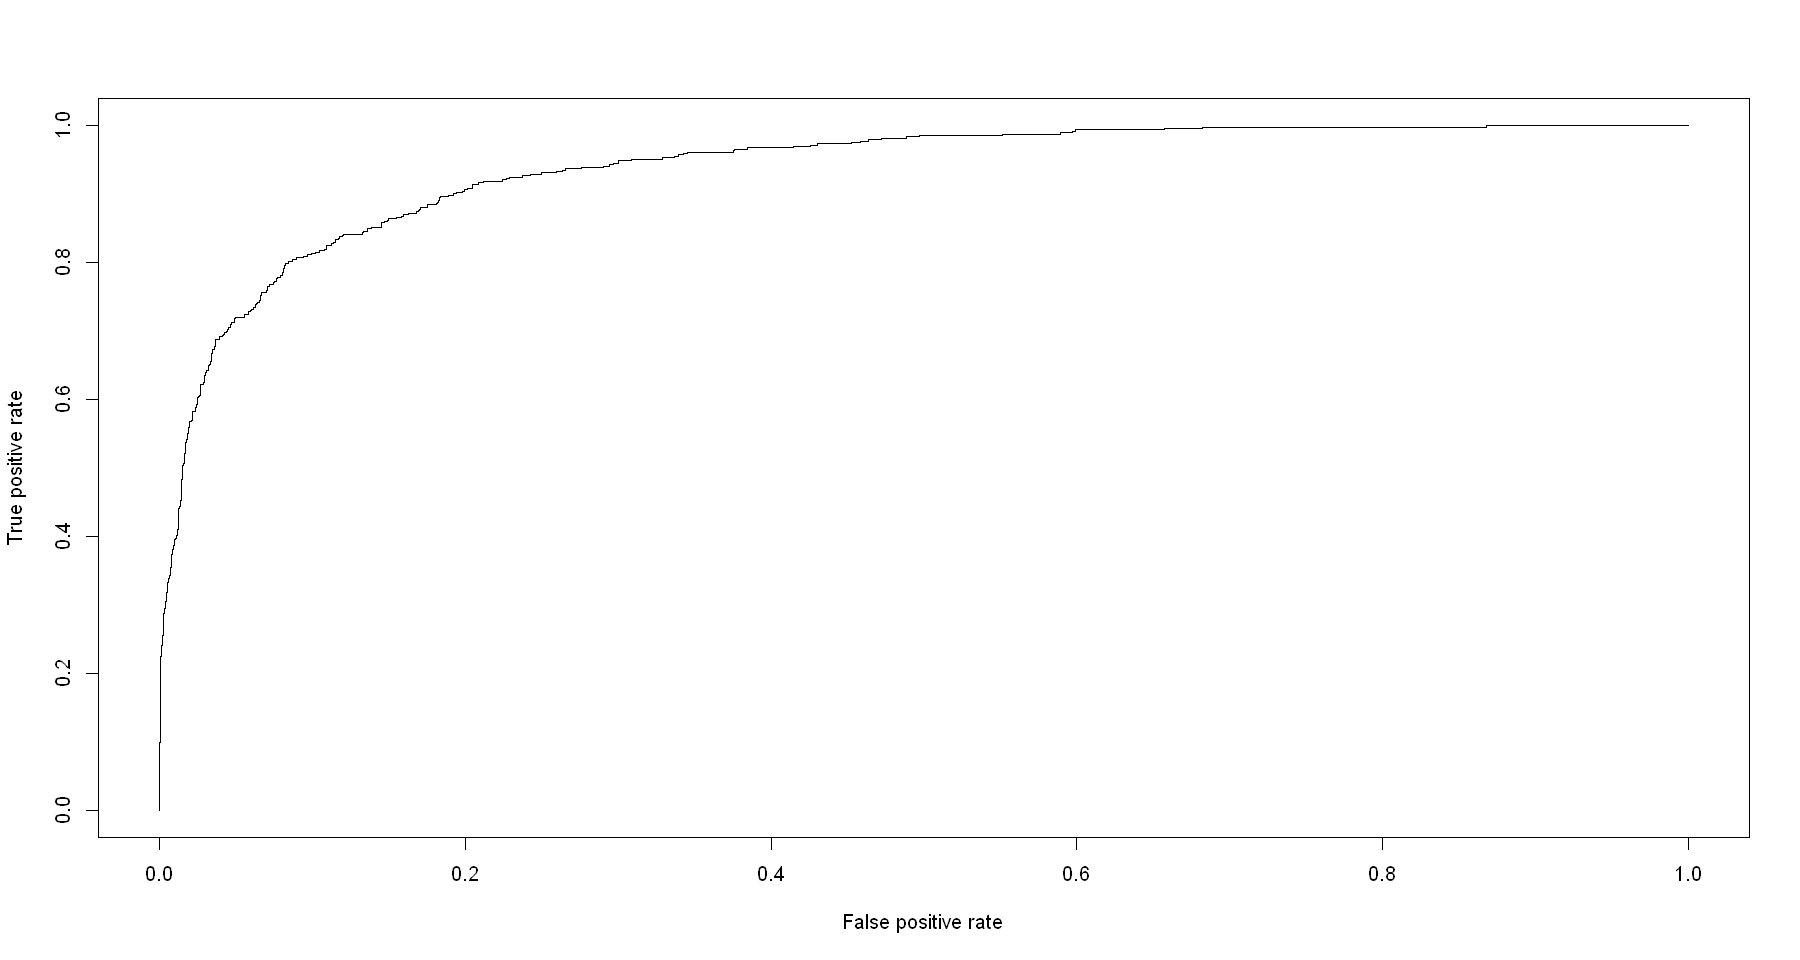

In [33]:
library(ROCR)
pred <- prediction(predicTrain, ClTrain$RainTomorrow)
perf <- performance(pred, "tpr", "fpr")
plot(perf)


In [34]:
tlogmod4 <- table(ClTrain$RainTomorrow, predicTrain > 0.6)
sum(diag(tlogmod4))/nrow(ClTrain)

[1] 0.9012397

In [35]:
test.pred <- predict(logmod4, type = "response", newdata = ClTest)
tlogmod4t <- table(ClTest$RainTomorrow, test.pred > 0.5)
sum(diag(tlogmod4t))/nrow(ClTest)

[1] 0.8958678

In [36]:
predROCR <- prediction(test.pred,ClTest$RainTomorrow)
as.numeric(performance(predROCR, "auc")@y.values)

[1] 0.9431906

In [39]:
## Fitting CART model
numFolds <- trainControl(method = "cv", number = 10)
cpGrid <- expand.grid(.cp=seq(0.001, 0.4, 0.001))
train(RainTomorrow ~., data=ClTrain, method="rpart", trControl= numFolds, tuneGrid= cpGrid)

CART 

2420 samples
  21 predictor
   2 classes: 'No', 'Yes' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 2178, 2177, 2179, 2179, 2178, 2177, ... 
Resampling results across tuning parameters:

  cp     Accuracy   Kappa     
  0.001  0.8549999  0.53494783
  0.002  0.8566494  0.53736772
  0.003  0.8653221  0.56116921
  0.004  0.8636743  0.55006651
  0.005  0.8644836  0.54633311
  0.006  0.8665463  0.54290248
  0.007  0.8690257  0.55369337
  0.008  0.8682061  0.54733198
  0.009  0.8682061  0.54733198
  0.010  0.8673797  0.54183515
  0.011  0.8682061  0.54386442
  0.012  0.8686210  0.54641801
  0.013  0.8686210  0.54641801
  0.014  0.8686193  0.53964104
  0.015  0.8686193  0.53964104
  0.016  0.8665566  0.53536962
  0.017  0.8665566  0.53536962
  0.018  0.8665566  0.53536962
  0.019  0.8661400  0.53289666
  0.020  0.8661400  0.53289666
  0.021  0.8644836  0.52967526
  0.022  0.8636606  0.53458934
  0.023  0.8644905  0.53743160
  0.024  0.8644905  0.53

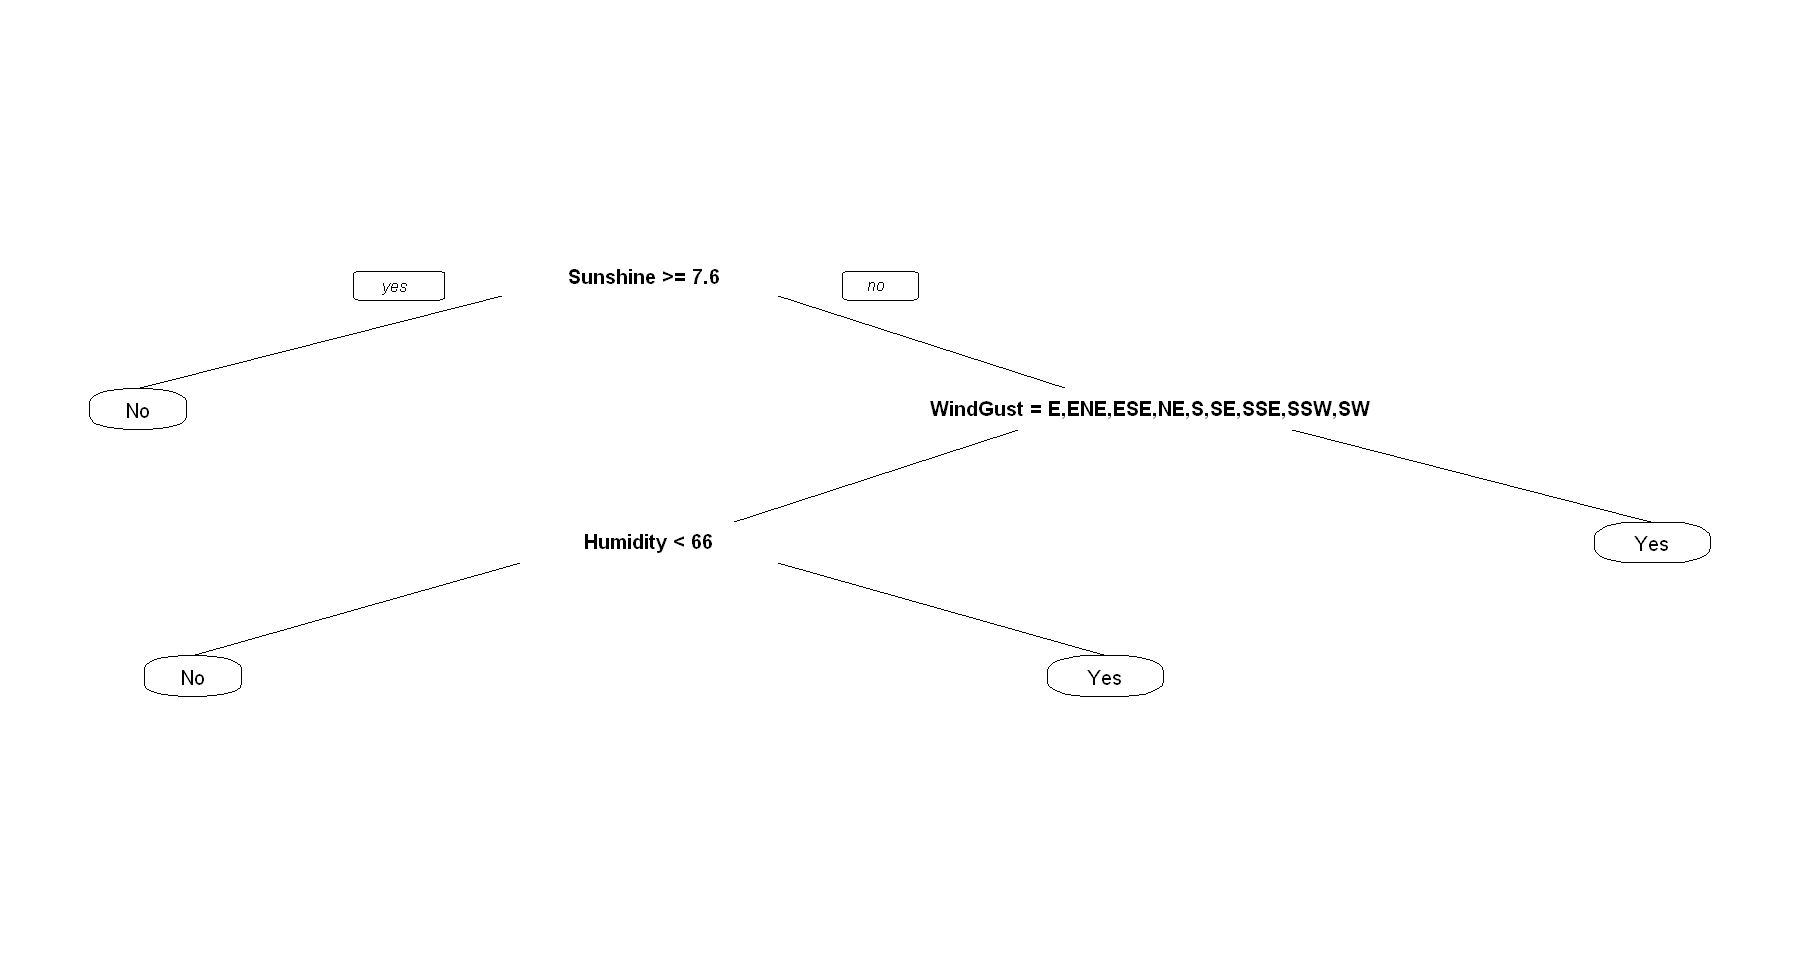

In [40]:
t.mod <- rpart(RainTomorrow ~ .-Date, data=ClTrain, method="class", cp = 0.032)
prp(t.mod)

In [41]:
pred.tree <- predict(t.mod, newdata = ClTest, type="class")
cartmod  <-  table(ClTest$RainTomorrow, pred.tree)
sum(diag(cartmod))/nrow(ClTest)

[1] 0.8909091

[1] 0.8353406

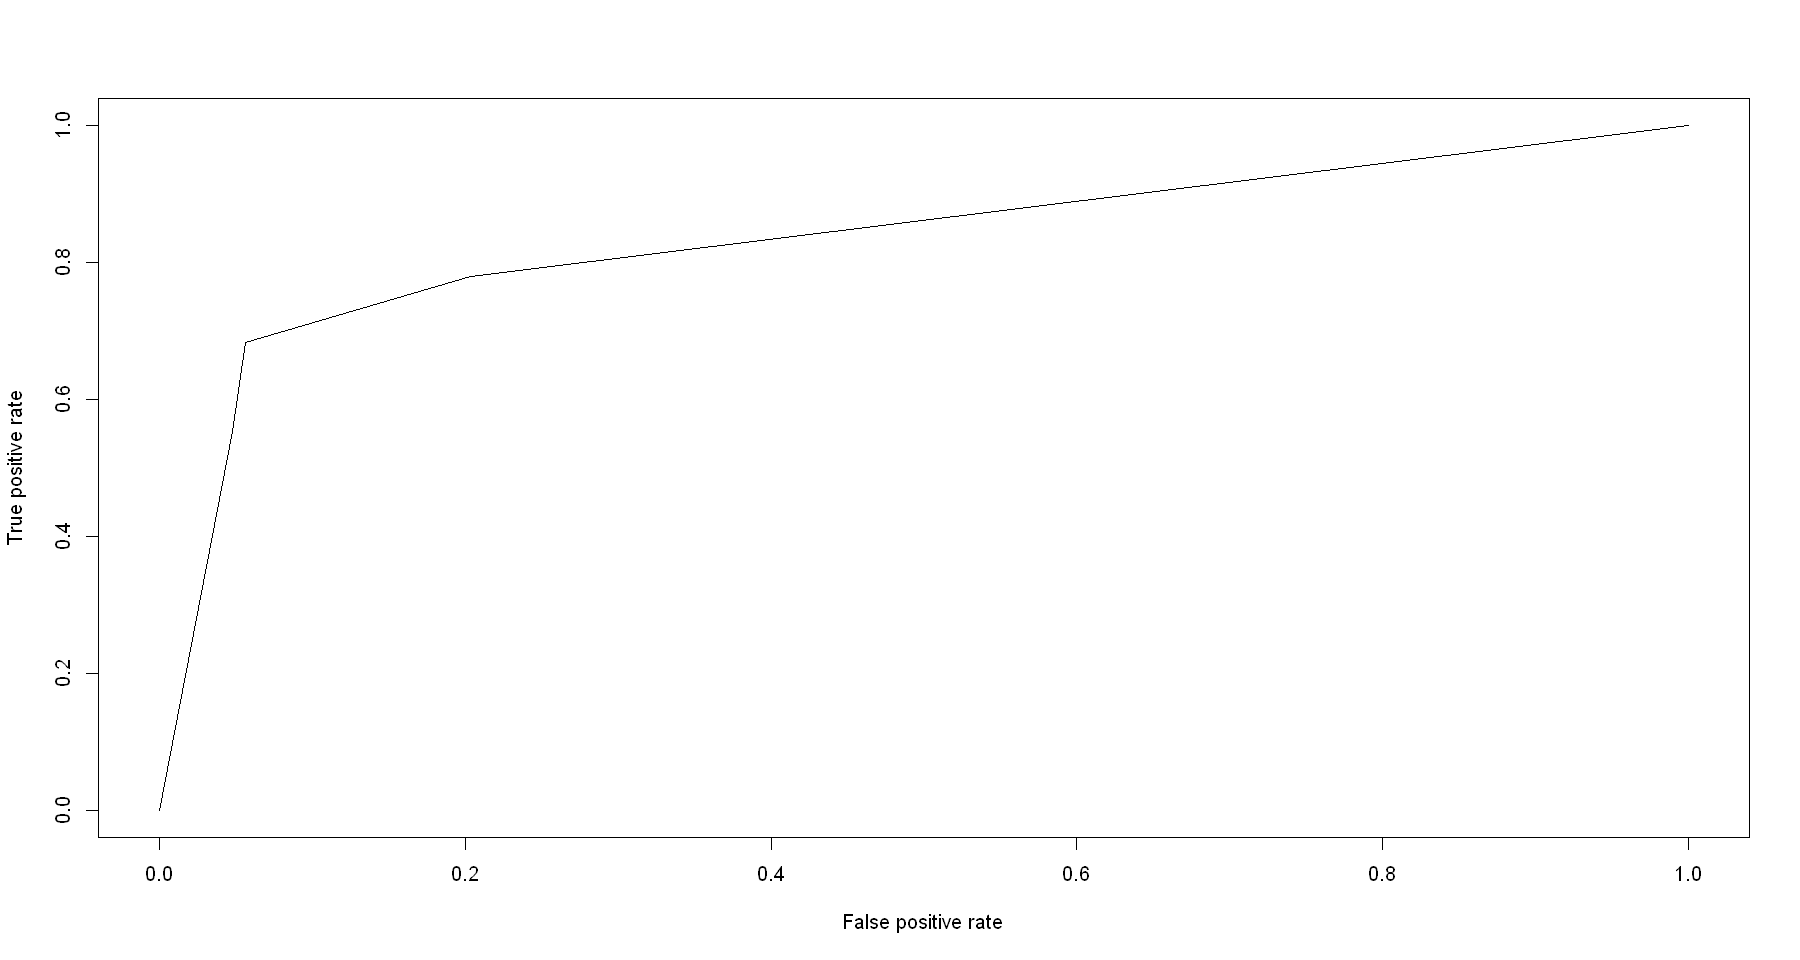

In [42]:
predROC <- predict(t.mod, newdata = ClTest)
pred <- prediction(predROC[,2], ClTest$RainTomorrow)
perf <- performance(pred, "tpr", "fpr")
plot(perf)
as.numeric(performance(pred, "auc")@y.values)

In [45]:
## Fitting RandomForest model
rf.model <- randomForest(RainTomorrow ~ .-Date , data=ClTrain, nodsize=5, ntree=500, mtry=3)
rf.model


Call:
 randomForest(formula = RainTomorrow ~ . - Date, data = ClTrain,      nodsize = 5, ntree = 500, mtry = 3) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 9.96%
Confusion matrix:
      No Yes class.error
No  1837  90  0.04670472
Yes  151 342  0.30628803

In [46]:

pred.rf <- predict(rf.model, newdata = ClTest)
pred.rf1 <- predict(rf.model, newdata = ClTest, type="prob")

forestmod  <-  table(ClTest$RainTomorrow, pred.rf)
sum(diag(forestmod))/nrow(ClTest)

[1] 0.9157025

In [47]:
ROC.pred <- prediction(pred.rf1[,2], ClTest$RainTomorrow)
as.numeric(performance(ROC.pred, "auc")@y.values)

[1] 0.9477954

In [48]:
########################################################################
# 2. Rainfall prediction
########################################################################

In [49]:
# Reading the dataset
weather <- read.csv('weatherAUS.csv')
weather$Date <- as.Date(weather$Date)


In [50]:
weather <- na.omit(weather)
weather$RainTomorrow <- as.factor(weather$RainTomorrow)
weather$RainToday <- as.factor(weather$RainToday)
weather$Location <- as.factor(weather$Location)
weather$WindGustDir <- as.factor(weather$WindGustDir)
weather$WindDir9am <- as.factor(weather$WindDir9am)
weather$WindDir3pm <- as.factor(weather$WindDir3pm)


In [51]:
perth <- subset(weather, weather$Location == "Perth")


In [52]:
# Adding A coulumn for Rainfall tomorrow
perth$RainfallTomorrow[nrow(perth)] <- 0
for (i in 1:nrow(perth)-1) {
  perth$RainfallTomorrow[i] <- perth$Rainfall[i+1]
}


In [53]:
# trying to fit a regression model to predict the amount of Rainfall

library(caTools)
set.seed(1000)
split <- sample.split(perth$RainfallTomorrow, SplitRatio = 0.8)
ClTrain <- subset(perth, split==T,select = -c(Location))
ClTest <- subset(perth, split==F,select = -c(Location))

In [54]:
model1 <- lm(RainfallTomorrow ~ . -Date -WindGustDir -WindDir9am - WindSpeed9am -WindDir3pm -Temp3pm -MaxTemp - Temp9am - Cloud9am  - Humidity9am  - WindSpeed3pm -RainTomorrow -RainToday , data = ClTrain)
summary(model1)


Call:
lm(formula = RainfallTomorrow ~ . - Date - WindGustDir - WindDir9am - 
    WindSpeed9am - WindDir3pm - Temp3pm - MaxTemp - Temp9am - 
    Cloud9am - Humidity9am - WindSpeed3pm - RainTomorrow - RainToday, 
    data = ClTrain)

Residuals:
    Min      1Q  Median      3Q     Max 
-14.187  -2.054  -0.441   1.149 100.704 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   283.089938  25.511414  11.097  < 2e-16 ***
MinTemp        -0.193160   0.034848  -5.543  3.3e-08 ***
Rainfall        0.027523   0.020453   1.346    0.179    
Evaporation    -0.052120   0.055855  -0.933    0.351    
Sunshine       -0.486423   0.050405  -9.650  < 2e-16 ***
WindGustSpeed   0.127743   0.012881   9.917  < 2e-16 ***
Humidity3pm     0.092017   0.009303   9.892  < 2e-16 ***
Pressure9am     0.988540   0.073101  13.523  < 2e-16 ***
Pressure3pm    -1.269501   0.072367 -17.543  < 2e-16 ***
Cloud3pm        0.016234   0.056777   0.286    0.775    
---
Signif. codes:  0 '***' 0.00

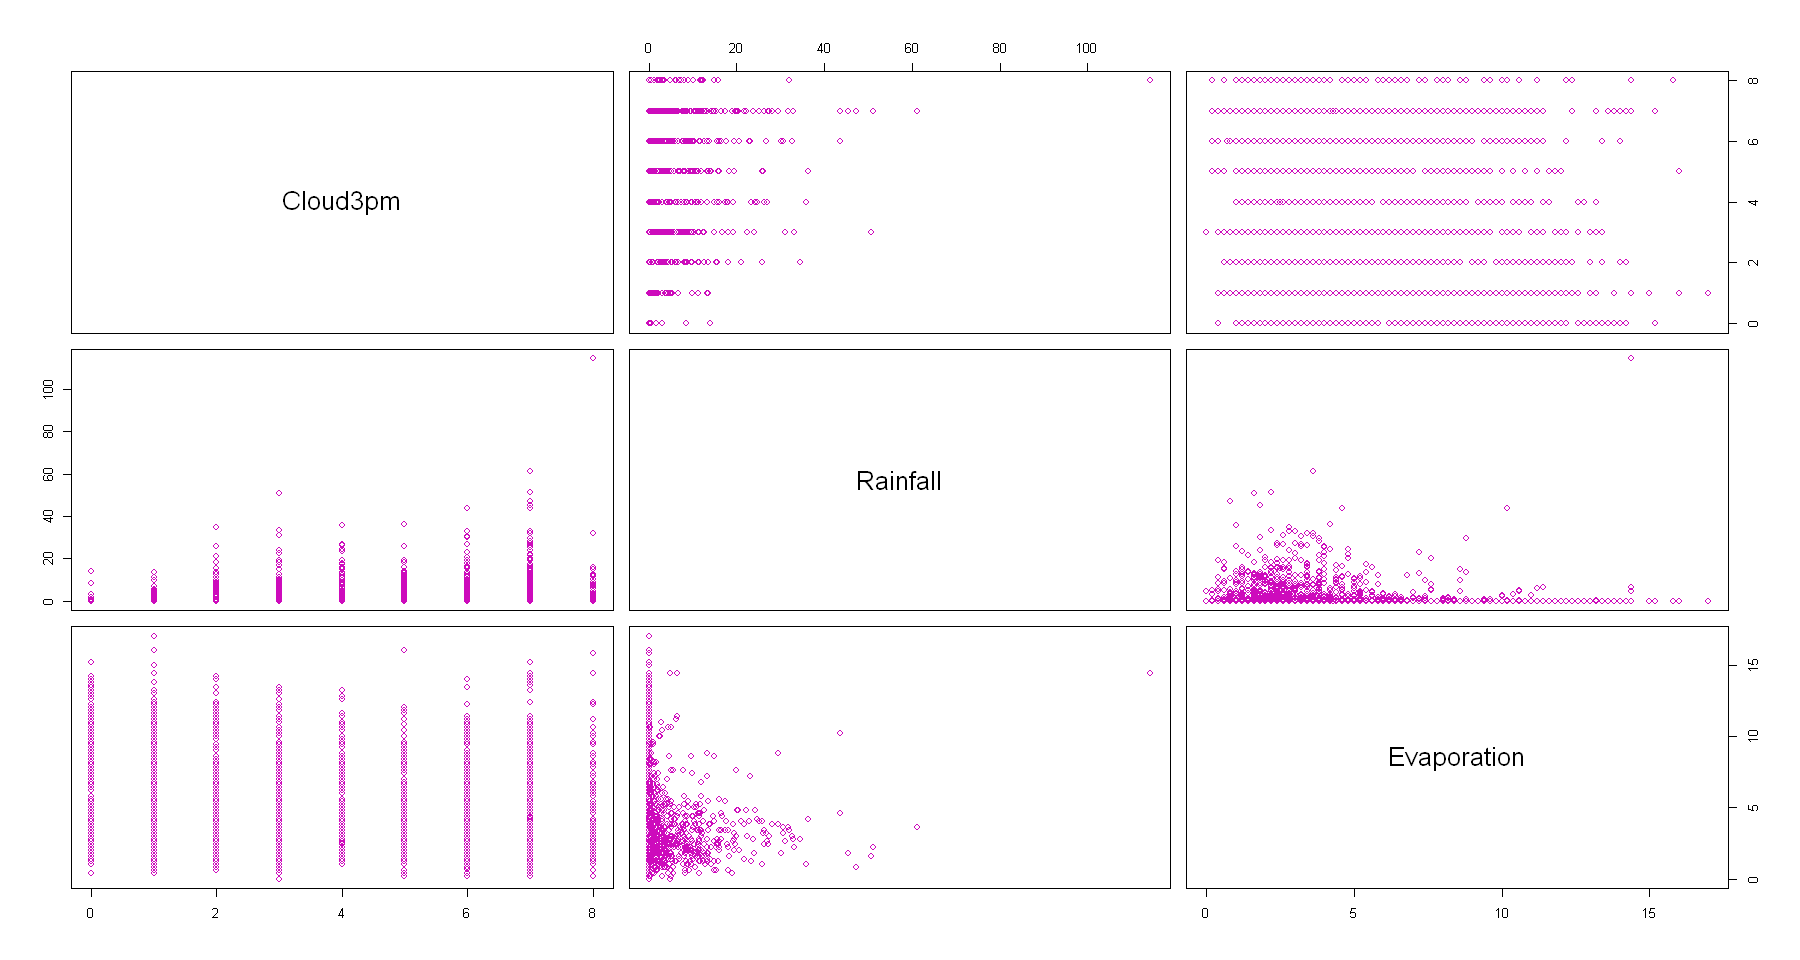

In [55]:
pairs(ClTrain[,c("Cloud3pm","Rainfall" , "Evaporation")], col = 14)


In [56]:
model2 <- lm(RainfallTomorrow ~ . -Date -WindGustDir -WindDir9am - WindSpeed9am -WindDir3pm -Temp3pm -MaxTemp - Temp9am - Cloud9am  - Humidity9am  - WindSpeed3pm -RainTomorrow -RainToday - Cloud3pm -Evaporation -Rainfall, data = ClTrain)
summary(model2)


Call:
lm(formula = RainfallTomorrow ~ . - Date - WindGustDir - WindDir9am - 
    WindSpeed9am - WindDir3pm - Temp3pm - MaxTemp - Temp9am - 
    Cloud9am - Humidity9am - WindSpeed3pm - RainTomorrow - RainToday - 
    Cloud3pm - Evaporation - Rainfall, data = ClTrain)

Residuals:
    Min      1Q  Median      3Q     Max 
-14.518  -2.068  -0.435   1.141 100.221 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   285.095599  24.693570  11.545  < 2e-16 ***
MinTemp        -0.218378   0.028166  -7.753 1.31e-14 ***
Sunshine       -0.517276   0.038197 -13.543  < 2e-16 ***
WindGustSpeed   0.129438   0.012658  10.226  < 2e-16 ***
Humidity3pm     0.094778   0.008845  10.716  < 2e-16 ***
Pressure9am     0.958032   0.070343  13.619  < 2e-16 ***
Pressure3pm    -1.240678   0.070323 -17.643  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.041 on 2423 degrees of freedom
Multiple R-squared:  0.3352,	Adjusted R-s

[1] 114.4  61.2  51.2  50.6  47.2  45.4  43.6  43.6  42.8  40.8  40.6  40.2
  [13]  38.6  38.6  36.4  35.8  34.6  33.2  33.0  32.8  32.0  31.8  31.0  30.6
  [25]  30.6  30.2  29.8  29.6  29.4  28.2  27.4  27.2  27.0  26.8  26.2  26.2
  [37]  26.0  26.0  25.8  25.8  25.2  25.0  24.6  24.2  24.0  24.0  23.8  23.4
  [49]  23.2  22.8  22.4  22.2  21.8  21.8  21.0  20.6  20.4  20.4  20.2  20.0
  [61]  20.0  19.6  19.4  19.4  19.4  19.2  19.2  19.2  19.0  18.4  18.2  18.2
  [73]  18.0  18.0  18.0  17.8  17.6  17.6  17.6  17.6  17.4  17.4  17.2  16.8
  [85]  16.8  16.6  16.6  16.6  16.4  16.2  16.2  16.0  16.0  16.0  16.0  16.0
  [97]  15.8  15.8  15.6  15.6  15.6  15.4  15.4  15.0  15.0  15.0  14.8  14.8
 [109]  14.8  14.6  14.2  14.2  14.0  14.0  14.0  13.8  13.6  13.6  13.6  13.6
 [121]  13.4  13.4  13.4  13.4  13.4  13.2  13.2  13.2  12.8  12.8  12.8  12.6
 [133]  12.6  12.6  12.6  12.6  12.4  12.4  12.4  12.4  12.4  12.2  12.2  12.0
 [145]  12.0  12.0  12.0  12.0  11.8  11.8  11.8  11.8  11.6  11.6  11.6  11.6
 [157]  11.4  11.4  11.4  11.4  11.4  11.2  11.2  11.2  11.2  11.2  11.2  11.2
 [169]  11.2  11.0  11.0  11.0  10.8  10.8  10.6  10.6  10.6  10.6  10.4  10.4
 [181]  10.4  10.4  10.2  10.2  10.2  10.0  10.0  10.0  10.0  10.0   9.8   9.8
 [193]   9.8   9.8   9.6   9.6   9.6   9.6   9.6   9.6   9.6   9.6   9.4   9.4
 [205]   9.4   9.2   9.2   9.2   9.0   9.0   9.0   9.0   9.0   9.0   9.0   9.0
 [217]   8.8   8.8   8.8   8.8   8.8   8.6   8.6   8.6   8.6   8.6   8.6   8.6
 [229]   8.6   8.4   8.4   8.4   8.4   8.4   8.4   8.4   8.2   8.2   8.2   8.0
 [241]   8.0   8.0   8.0   8.0   8.0   8.0   7.8   7.8   7.8   7.8   7.8   7.8
 [253]   7.8   7.6   7.6   7.6   7.6   7.4   7.4   7.4   7.4   7.2   7.2   7.2
 [265]   7.0   7.0   7.0   7.0   6.8   6.8   6.8   6.8   6.8   6.8   6.6   6.6
 [277]   6.6   6.6   6.6   6.4   6.4   6.4   6.4   6.4   6.4   6.2   6.2   6.2
 [289]   6.2   6.2   6.2   6.2   6.0   6.0   6.0   6.0   6.0   6.0   6.0   5.8
 [301]   5.8   5.8   5.8   5.8   5.6   5.6   5.6   5.6   5.6   5.4   5.4   5.4
 [313]   5.4   5.4   5.4   5.4   5.4   5.4   5.4   5.2   5.2   5.2   5.2   5.2
 [325]   5.2   5.2   5.2   5.0   5.0   5.0   5.0   5.0   5.0   5.0   5.0   5.0
 [337]   5.0   5.0   4.8   4.8   4.8   4.8   4.8   4.8   4.8   4.8   4.8   4.8
 [349]   4.6   4.6   4.6   4.6   4.6   4.6   4.6   4.6   4.6   4.6   4.6   4.6
 [361]   4.4   4.4   4.4   4.4   4.4   4.4   4.2   4.2   4.2   4.2   4.2   4.2
 [373]   4.2   4.2   4.2   4.2   4.0   4.0   4.0   4.0   4.0   4.0   4.0   4.0
 [385]   4.0   4.0   3.8   3.8   3.8   3.8   3.8   3.8   3.8   3.8   3.8   3.8
 [397]   3.8   3.6   3.6   3.6   3.6   3.6   3.6   3.6   3.6   3.4   3.4   3.4
 [409]   3.4   3.4   3.4   3.4   3.4   3.4   3.4   3.4   3.4   3.4   3.4   3.4
 [421]   3.4   3.2   3.2   3.2   3.2   3.2   3.2   3.2   3.2   3.2   3.0   3.0
 [433]   3.0   3.0   3.0   3.0   3.0   3.0   3.0   3.0   3.0   3.0   3.0   3.0
 [445]   3.0   3.0   2.8   2.8   2.8   2.8   2.8   2.8   2.8   2.8   2.8   2.8
 [457]   2.8   2.8   2.8   2.8   2.8   2.8   2.8   2.8   2.6   2.6   2.6   2.6
 [469]   2.6   2.6   2.6   2.6   2.6   2.6   2.6   2.6   2.6   2.6   2.6   2.6
 [481]   2.6   2.6   2.4   2.4   2.4   2.4   2.4   2.4   2.4   2.4   2.4   2.2
 [493]   2.2   2.2   2.2   2.2   2.2   2.2   2.2   2.2   2.2   2.2   2.2   2.2
 [505]   2.2   2.2   2.2   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0
 [517]   2.0   2.0   2.0   2.0   2.0   1.8   1.8   1.8   1.8   1.8   1.8   1.8
 [529]   1.8   1.8   1.8   1.8   1.8   1.8   1.8   1.6   1.6   1.6   1.6   1.6
 [541]   1.6   1.6   1.6   1.6   1.6   1.6   1.6   1.6   1.6   1.6   1.6   1.6
 [553]   1.4   1.4   1.4   1.4   1.4   1.4   1.4   1.4   1.4   1.4   1.4   1.4
 [565]   1.4   1.2   1.2   1.2   1.2   1.2   1.2   1.2   1.2   1.2   1.2   1.2
 [577]   1.2   1.2   1.2   1.2   1.2   1.2   1.2   1.2   1.2   1.2   1.2   1.2
 [589]   1.2   1.2   1.2   1.2   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0
 [601]   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.

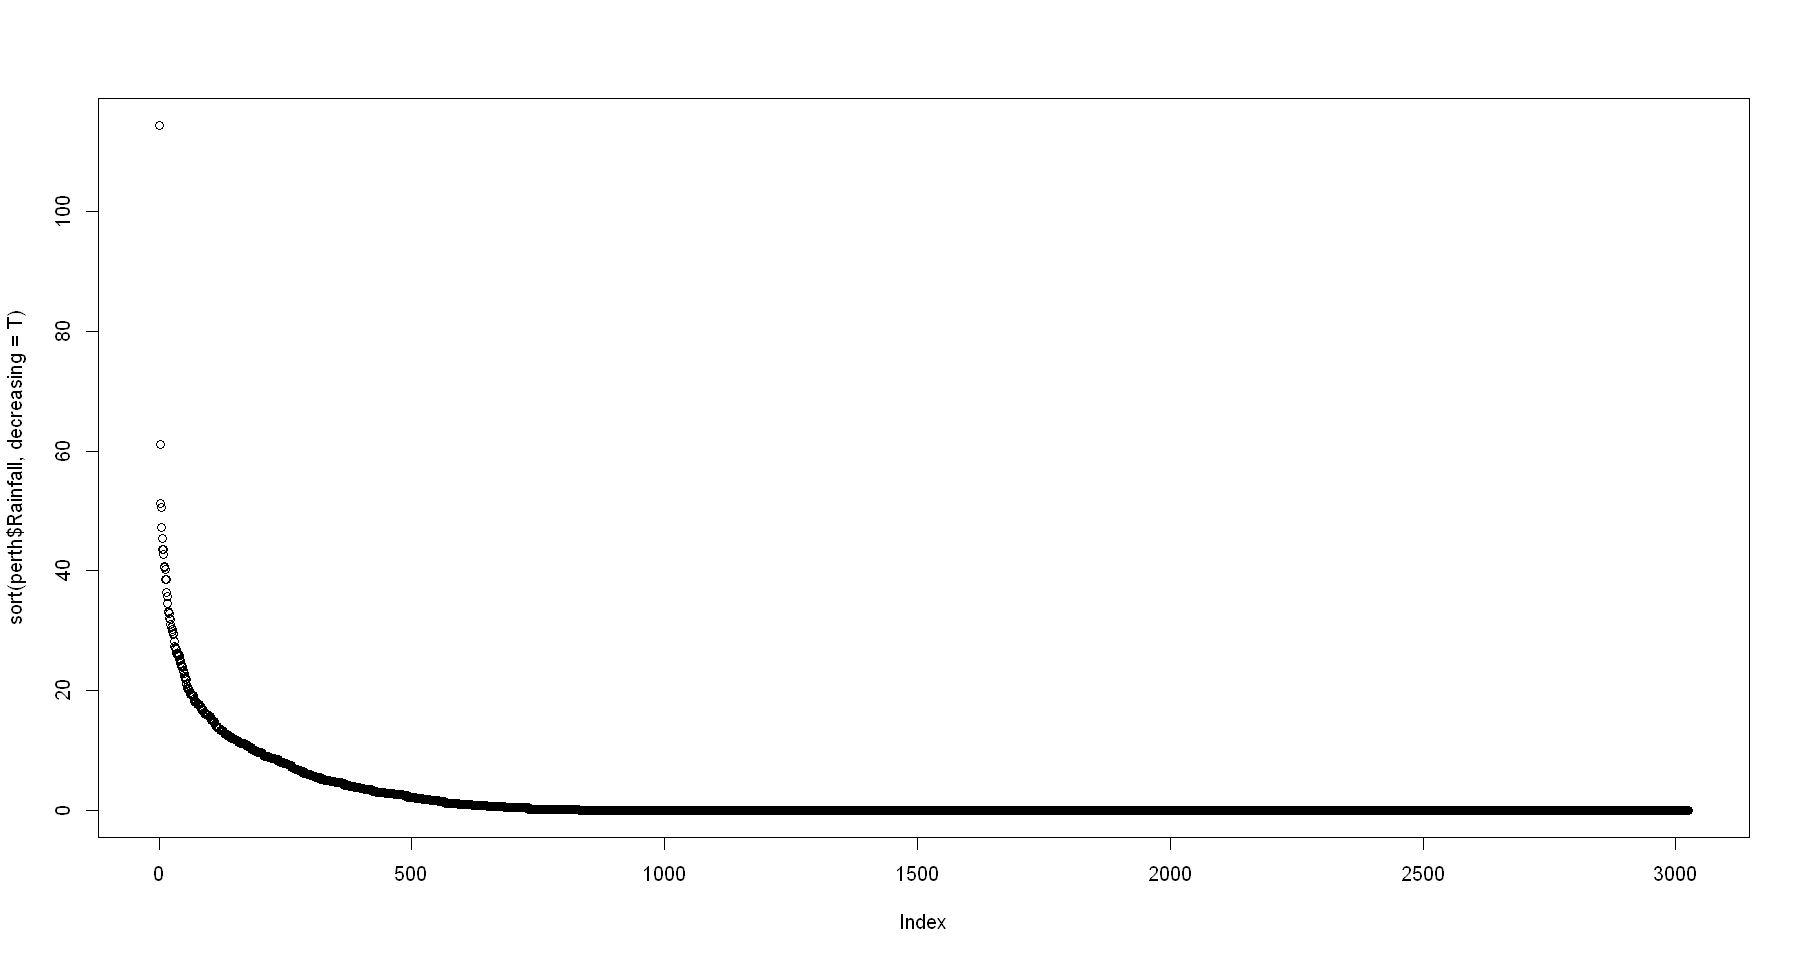

In [57]:
# Classifying the RainfallTomorrow amount

sort(perth$Rainfall , decreasing = T)
plot(sort(perth$Rainfall , decreasing = T))

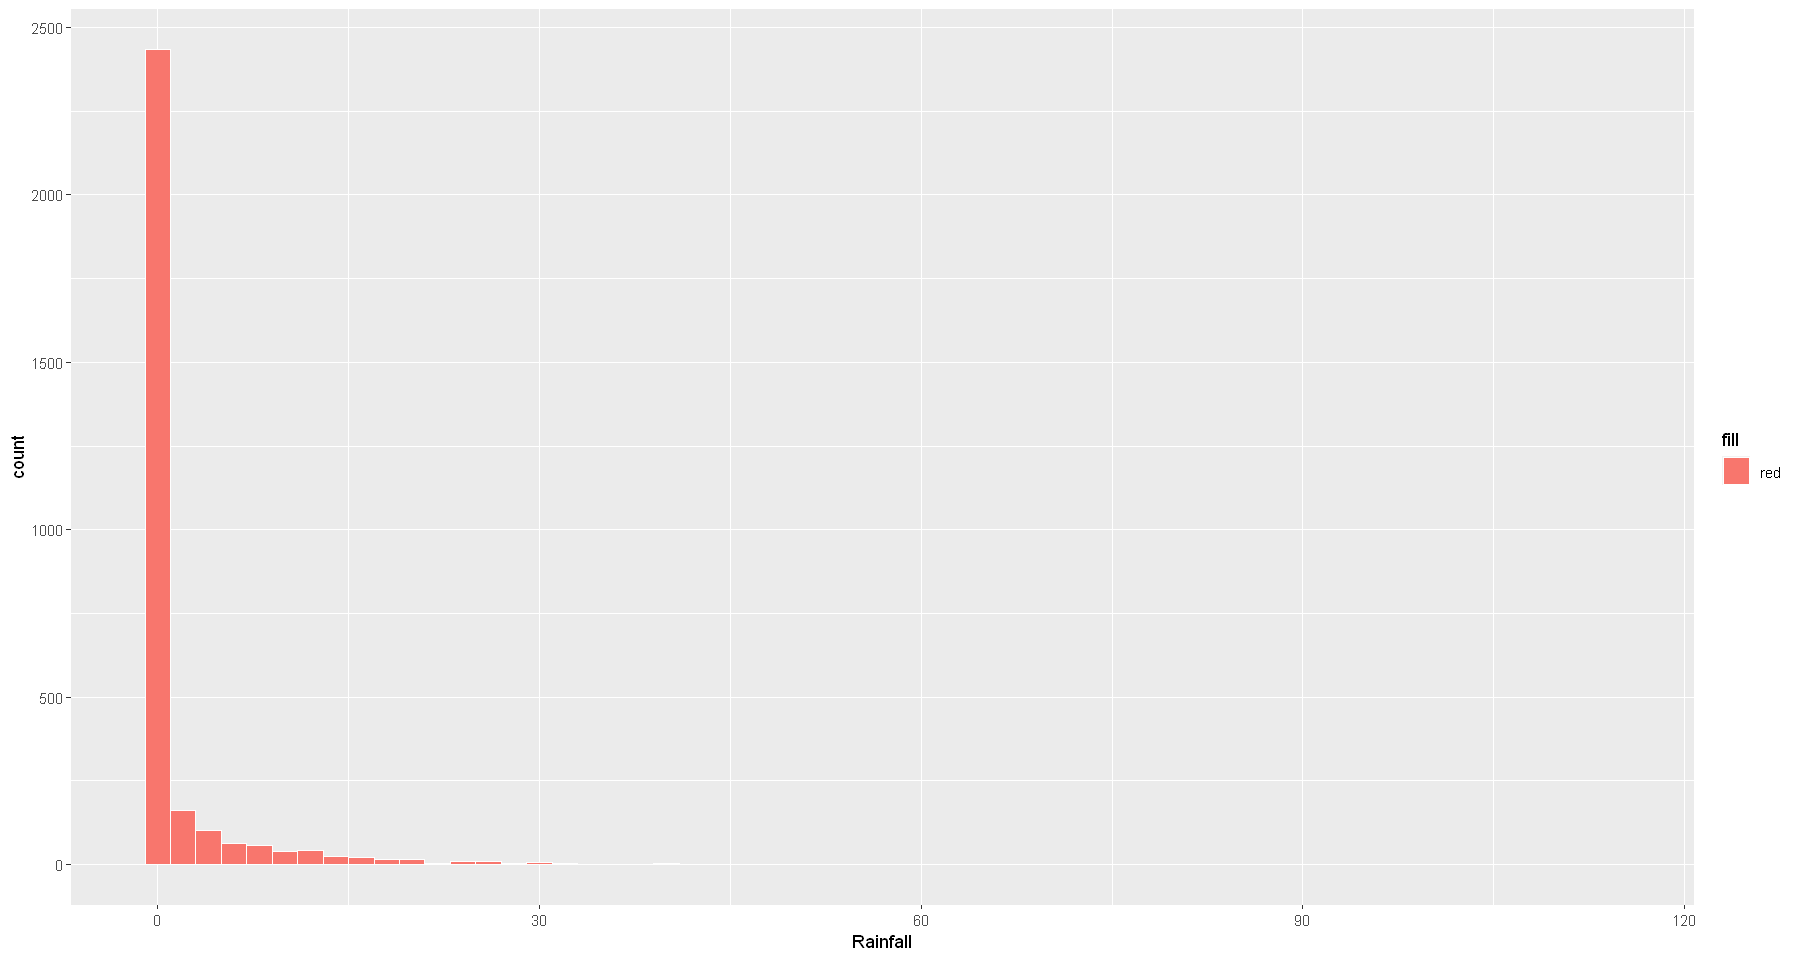

In [58]:
ggplot(perth, aes(x= Rainfall, fill = "red") ) + geom_histogram( binwidth = 2, color= "white") 

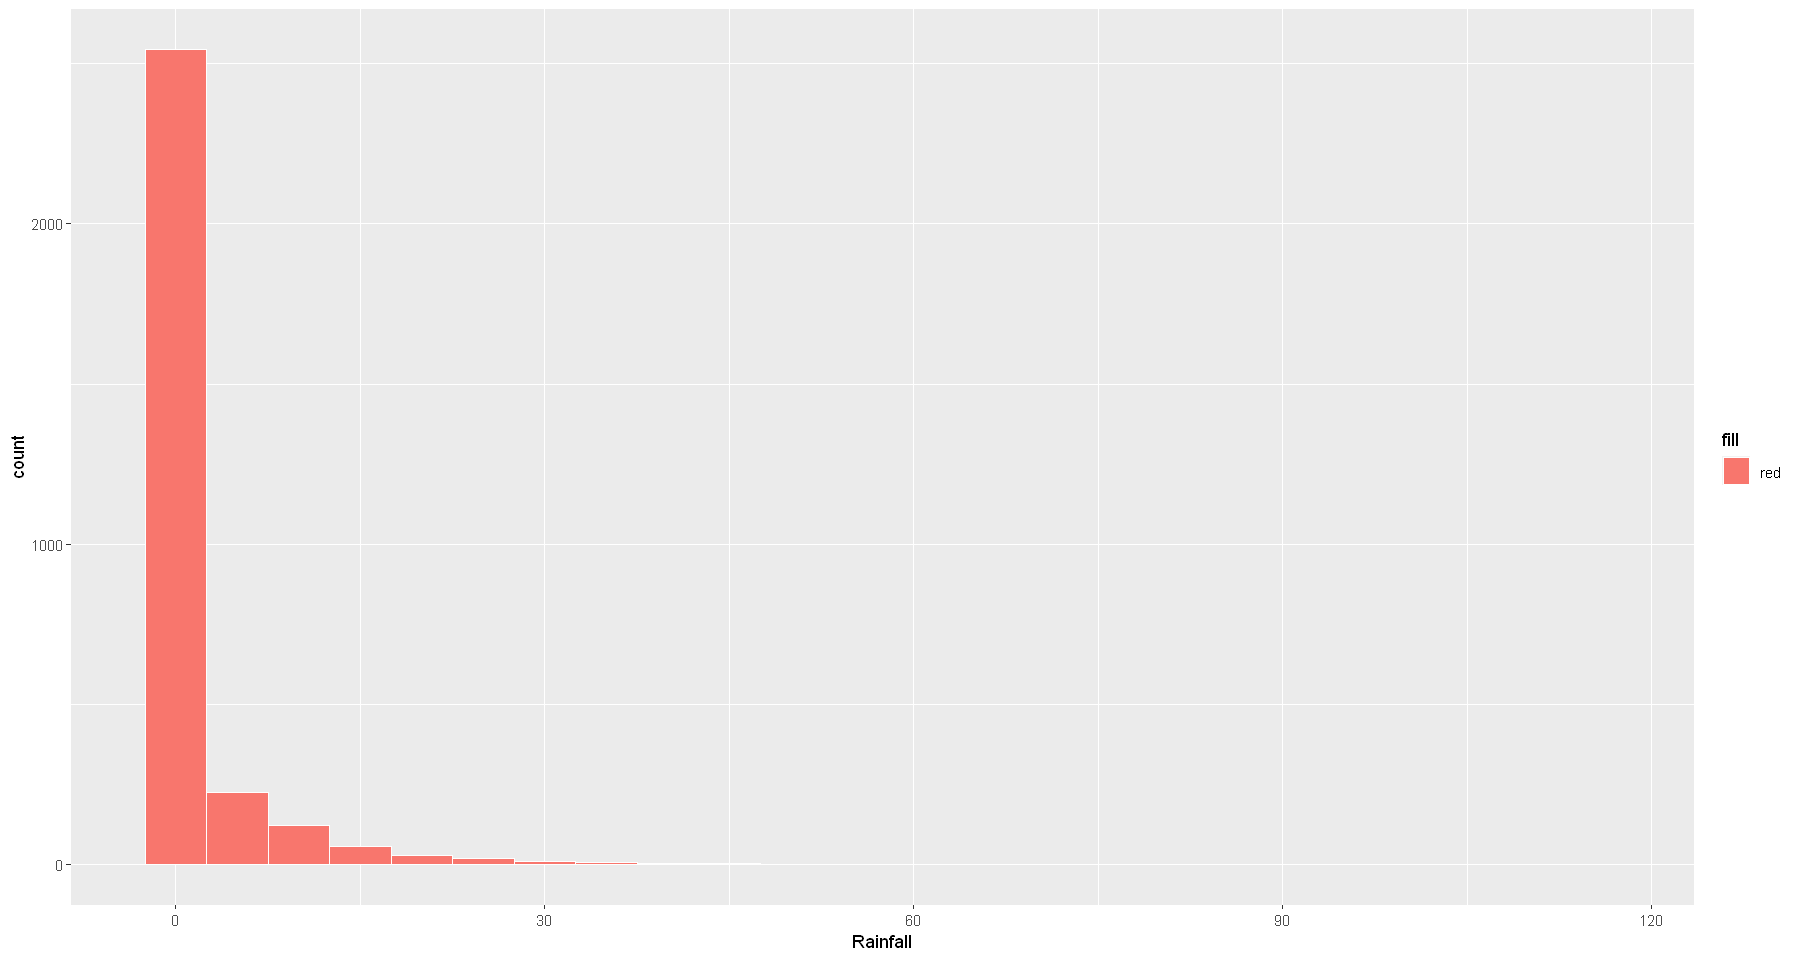

In [60]:
ggplot(perth, aes(x= Rainfall, fill = "red") ) + geom_histogram( bins = 5 , binwidth = 5, color= "white") 

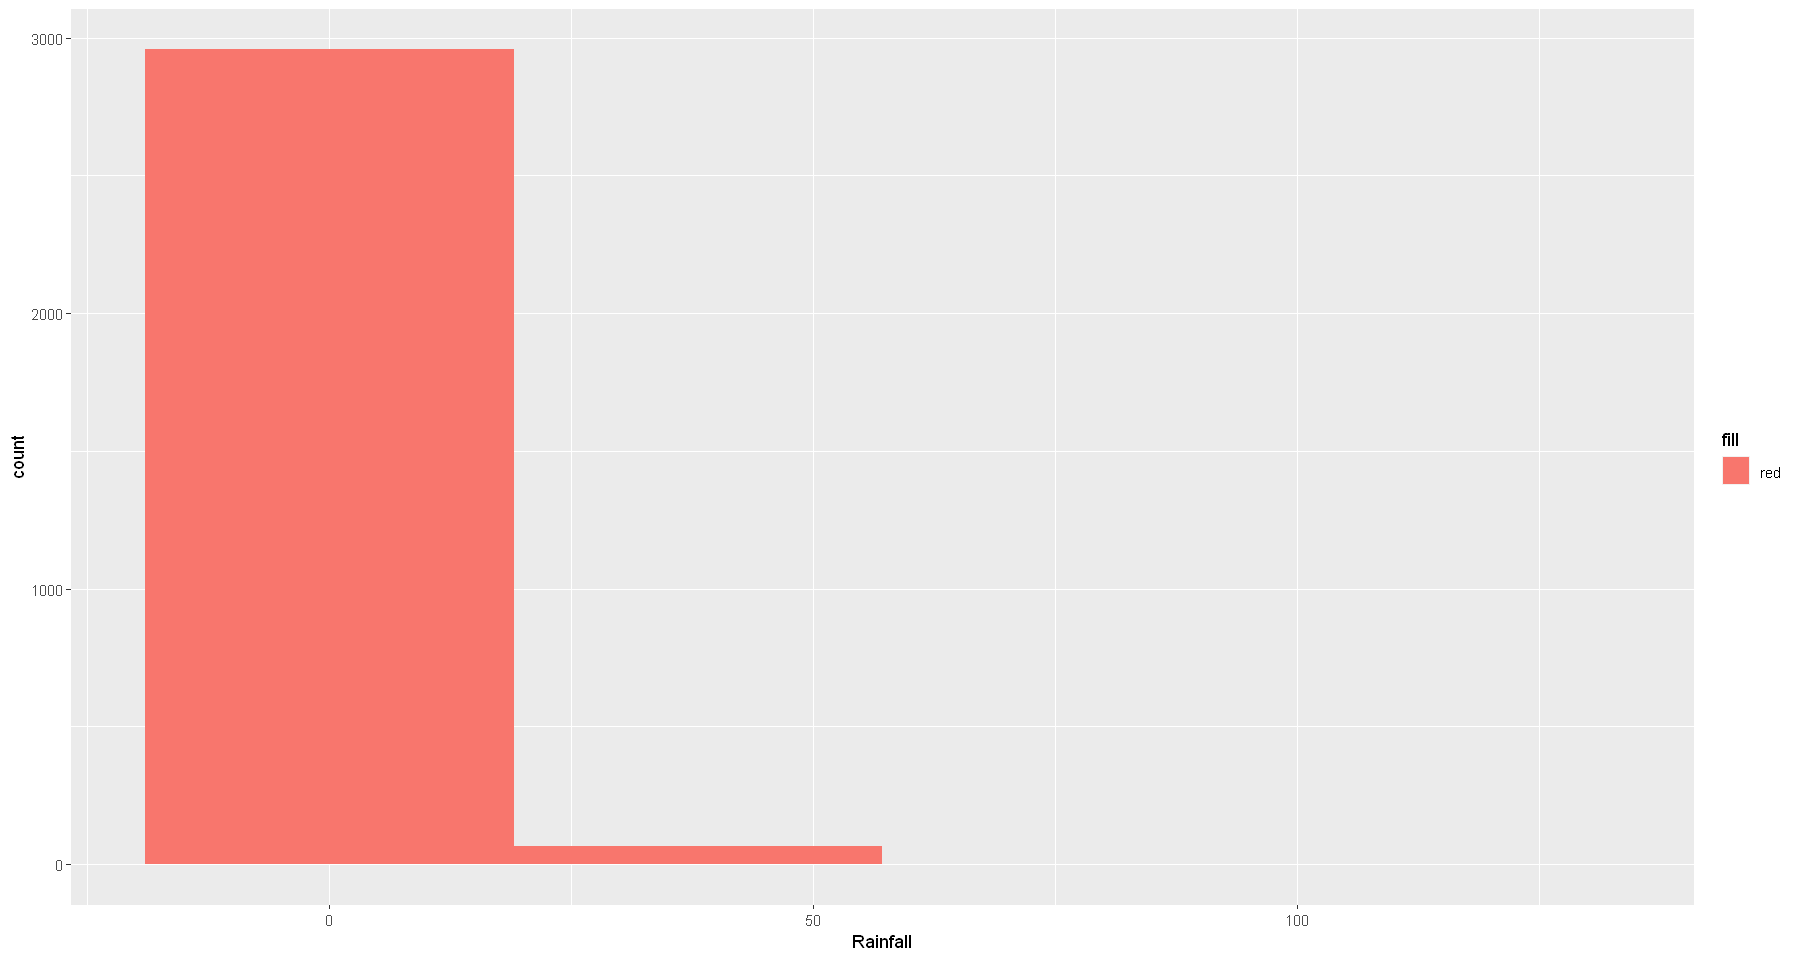

In [61]:
ggplot(perth, aes(x= Rainfall, fill = "red") ) + geom_histogram( bins = 4) 

In [62]:
str(perth)

'data.frame':	3025 obs. of  24 variables:
 $ Date            : Date, format: "2008-07-02" "2008-07-04" ...
 $ Location        : Factor w/ 26 levels "AliceSprings",..: 16 16 16 16 16 16 16 16 16 16 ...
 $ MinTemp         : num  6.4 9.5 9.5 0.7 0.7 3.2 11.2 13.4 7.9 5.3 ...
 $ MaxTemp         : num  20.7 19.2 16.4 15.9 18.3 20.4 20.4 17.1 17.3 18.8 ...
 $ Rainfall        : num  0 1.8 1.8 6.8 0 0 4.6 2.6 4.4 0.2 ...
 $ Evaporation     : num  1.8 1.2 1.4 2.4 0.8 1.4 2.8 2.6 2.2 1 ...
 $ Sunshine        : num  7 4.7 4.9 9.3 9.3 6.9 1.7 4.2 5.4 2.3 ...
 $ WindGustDir     : Factor w/ 16 levels "E","ENE","ESE",..: 5 14 16 6 4 7 7 13 12 4 ...
 $ WindGustSpeed   : int  22 26 44 24 37 24 46 54 19 17 ...
 $ WindDir9am      : Factor w/ 16 levels "E","ENE","ESE",..: 3 6 14 2 5 5 5 13 4 5 ...
 $ WindDir3pm      : Factor w/ 16 levels "E","ENE","ESE",..: 2 7 13 5 6 4 6 13 12 14 ...
 $ WindSpeed9am    : int  6 11 13 4 15 9 19 26 7 7 ...
 $ WindSpeed3pm    : int  9 6 17 7 13 13 11 13 9 7 ...
 $ Humidity9

In [63]:
perth$RainfallTomorrow_class[perth$RainfallTomorrow >0 & perth$RainfallTomorrow <= 1] <- "Very Low rainfall"
perth$RainfallTomorrow_class[perth$RainfallTomorrow >1 & perth$RainfallTomorrow <= 5] <- "Low rainfall"
perth$RainfallTomorrow_class[perth$RainfallTomorrow >5 & perth$RainfallTomorrow <= 15] <- "Medium rainfall"
perth$RainfallTomorrow_class[perth$RainfallTomorrow >15 ] <- "High rainfall"

In [64]:
perth$RainfallToday_class[perth$Rainfall >0 & perth$Rainfall <= 1] <- "Very Low rainfall"
perth$RainfallToday_class[perth$Rainfall >1 & perth$Rainfall <= 5] <- "Low rainfall"
perth$RainfallToday_class[perth$Rainfall >5 & perth$Rainfall <= 15] <- "Medium rainfall"
perth$RainfallToday_class[perth$Rainfall >15 ] <- "High rainfall"


In [65]:
perth <- na.omit(perth)

In [66]:
table(perth$RainfallTomorrow_class)


    High rainfall      Low rainfall   Medium rainfall Very Low rainfall 
               64               158               140               143 

In [67]:
table(perth$RainfallToday_class)



    High rainfall      Low rainfall   Medium rainfall Very Low rainfall 
               79               163               158               105 

In [68]:
str(perth)

'data.frame':	505 obs. of  26 variables:
 $ Date                  : Date, format: "2008-07-04" "2008-07-05" ...
 $ Location              : Factor w/ 26 levels "AliceSprings",..: 16 16 16 16 16 16 16 16 16 16 ...
 $ MinTemp               : num  9.5 9.5 11.2 13.4 7.9 10.2 6.7 7.8 9 11.8 ...
 $ MaxTemp               : num  19.2 16.4 20.4 17.1 17.3 17.1 16.9 19.3 20.8 15.9 ...
 $ Rainfall              : num  1.8 1.8 4.6 2.6 4.4 24 2.6 12.6 4 5.4 ...
 $ Evaporation           : num  1.2 1.4 2.8 2.6 2.2 1.8 1.2 1.8 2 1.6 ...
 $ Sunshine              : num  4.7 4.9 1.7 4.2 5.4 6.7 3.9 9.4 1.3 2.2 ...
 $ WindGustDir           : Factor w/ 16 levels "E","ENE","ESE",..: 14 16 7 13 12 13 16 10 6 16 ...
 $ WindGustSpeed         : int  26 44 46 54 19 44 46 52 39 44 ...
 $ WindDir9am            : Factor w/ 16 levels "E","ENE","ESE",..: 6 14 5 13 4 13 5 1 5 4 ...
 $ WindDir3pm            : Factor w/ 16 levels "E","ENE","ESE",..: 7 13 6 13 12 16 7 4 14 14 ...
 $ WindSpeed9am          : int  11 13 19 26 

In [69]:
perth$RainfallTomorrow_class <- as.factor(perth$RainfallTomorrow_class)
perth$RainfallToday_class <- as.factor(perth$RainfallToday_class)



In [70]:
str(perth)

'data.frame':	505 obs. of  26 variables:
 $ Date                  : Date, format: "2008-07-04" "2008-07-05" ...
 $ Location              : Factor w/ 26 levels "AliceSprings",..: 16 16 16 16 16 16 16 16 16 16 ...
 $ MinTemp               : num  9.5 9.5 11.2 13.4 7.9 10.2 6.7 7.8 9 11.8 ...
 $ MaxTemp               : num  19.2 16.4 20.4 17.1 17.3 17.1 16.9 19.3 20.8 15.9 ...
 $ Rainfall              : num  1.8 1.8 4.6 2.6 4.4 24 2.6 12.6 4 5.4 ...
 $ Evaporation           : num  1.2 1.4 2.8 2.6 2.2 1.8 1.2 1.8 2 1.6 ...
 $ Sunshine              : num  4.7 4.9 1.7 4.2 5.4 6.7 3.9 9.4 1.3 2.2 ...
 $ WindGustDir           : Factor w/ 16 levels "E","ENE","ESE",..: 14 16 7 13 12 13 16 10 6 16 ...
 $ WindGustSpeed         : int  26 44 46 54 19 44 46 52 39 44 ...
 $ WindDir9am            : Factor w/ 16 levels "E","ENE","ESE",..: 6 14 5 13 4 13 5 1 5 4 ...
 $ WindDir3pm            : Factor w/ 16 levels "E","ENE","ESE",..: 7 13 6 13 12 16 7 4 14 14 ...
 $ WindSpeed9am          : int  11 13 19 26 

In [71]:

## Splitting Data set into Train and Test sets
library(caTools)
set.seed(1000)
split <- sample.split(perth$RainfallTomorrow, SplitRatio = 0.8)
ClTrain <- subset(perth, split==T,select = -c(Location,RainfallTomorrow,Rainfall))
ClTest <- subset(perth, split==F,select = -c(Location,RainfallTomorrow,Rainfall))


In [72]:

## Fitting CART model

numFolds <- trainControl(method = "cv", number = 10)
cpGrid <- expand.grid(.cp=seq(0.001, 0.4, 0.001))
train(RainfallTomorrow_class ~., data=ClTrain, method="rpart", trControl= numFolds, tuneGrid= cpGrid)

CART 

412 samples
 22 predictor
  4 classes: 'High rainfall', 'Low rainfall', 'Medium rainfall', 'Very Low rainfall' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 371, 369, 371, 370, 372, 372, ... 
Resampling results across tuning parameters:

  cp     Accuracy   Kappa     
  0.001  0.5921065  0.44395046
  0.002  0.5945455  0.44696699
  0.003  0.5945455  0.44696699
  0.004  0.5966966  0.44923026
  0.005  0.5966966  0.44923026
  0.006  0.5991966  0.45279720
  0.007  0.5991966  0.45279720
  0.008  0.5844406  0.43188622
  0.009  0.5844406  0.43188622
  0.010  0.5890917  0.43796412
  0.011  0.5890917  0.43796412
  0.012  0.5939698  0.44287981
  0.013  0.5939698  0.44287981
  0.014  0.5865973  0.43391395
  0.015  0.5865973  0.43391395
  0.016  0.5770793  0.42116587
  0.017  0.5770793  0.42060483
  0.018  0.5890476  0.43456015
  0.019  0.5820708  0.42448449
  0.020  0.5772537  0.41628977
  0.021  0.5749309  0.41228441
  0.022  0.5749309  0.41272040
  0.

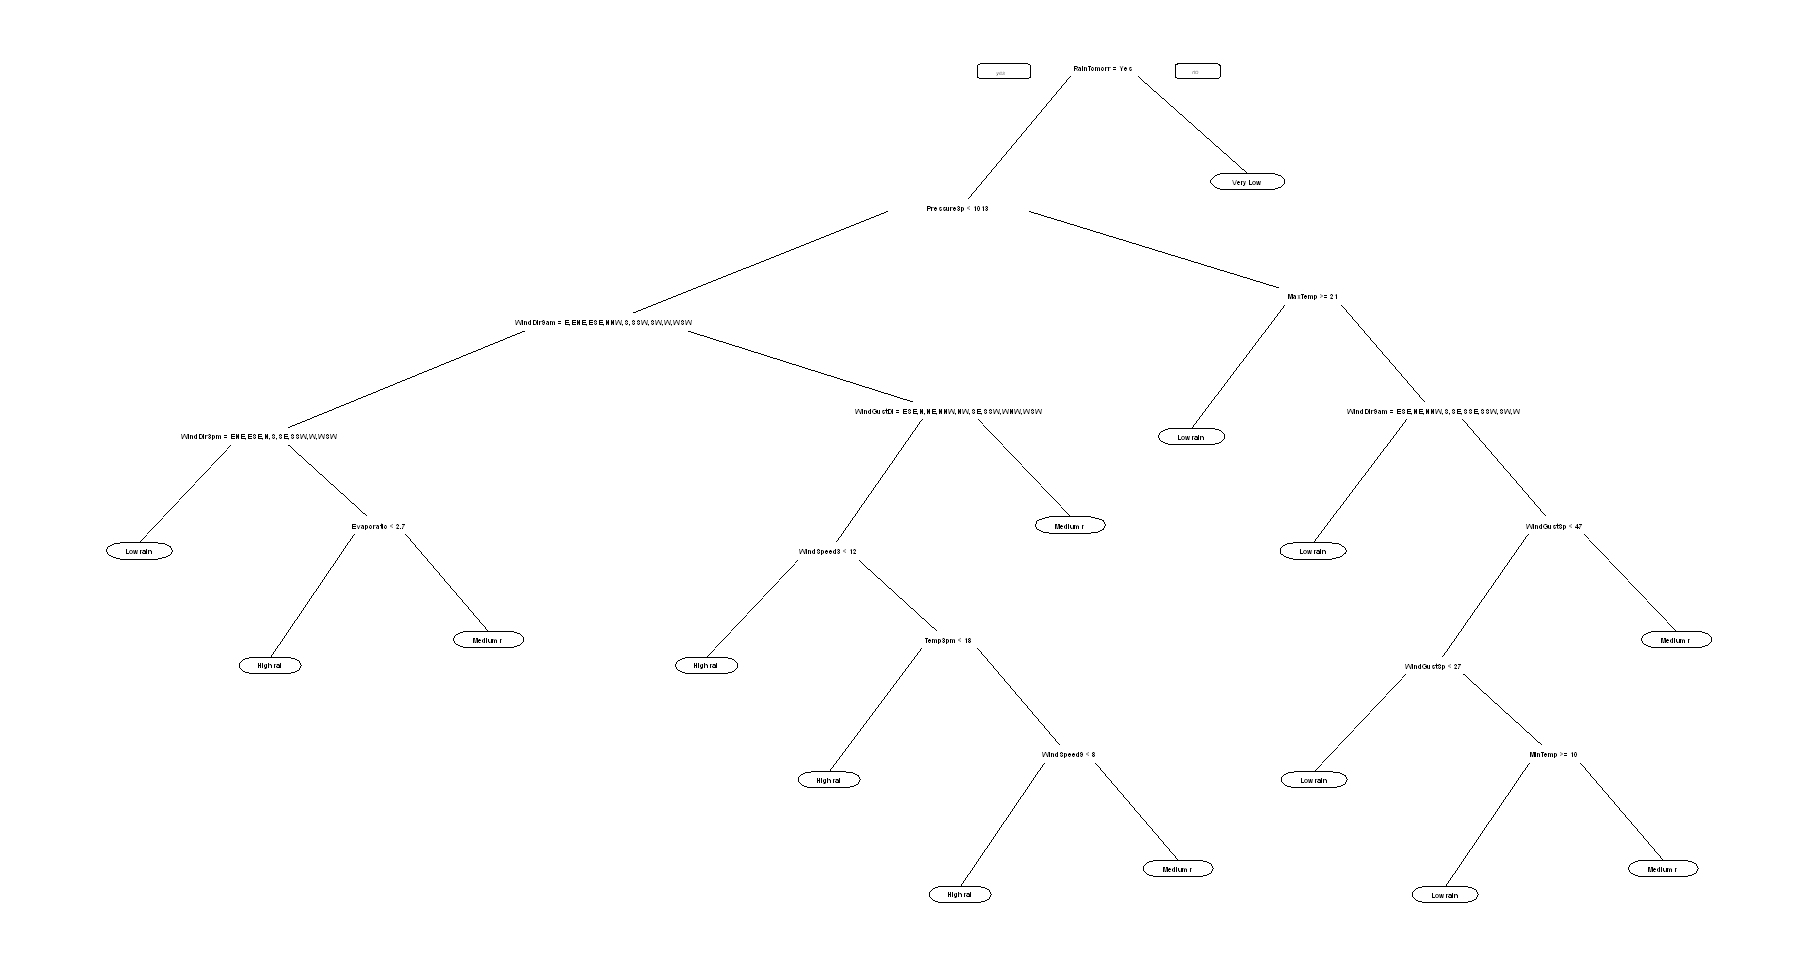

In [73]:
t.mod <- rpart(RainfallTomorrow_class ~ .-Date , data=ClTrain, method="class", cp = 0.007)
prp(t.mod)

In [74]:
pred.tree <- predict(t.mod, newdata = ClTest, type="class")
cartmod  <-  table(ClTest$RainfallTomorrow_class, pred.tree)
sum(diag(cartmod))/nrow(ClTest)


[1] 0.655914

In [75]:
## Fitting RandomForest model
rf.model <- randomForest(RainfallTomorrow_class ~ .-Date  , data=ClTrain, nodsize=5, ntree=500, mtry=3)
rf.model


Call:
 randomForest(formula = RainfallTomorrow_class ~ . - Date, data = ClTrain,      nodsize = 5, ntree = 500, mtry = 3) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 38.83%
Confusion matrix:
                  High rainfall Low rainfall Medium rainfall Very Low rainfall
High rainfall                 8           17              36                 1
Low rainfall                  4           87              32                 3
Medium rainfall              16           45              49                 0
Very Low rainfall             1            4               1               108
                  class.error
High rainfall      0.87096774
Low rainfall       0.30952381
Medium rainfall    0.55454545
Very Low rainfall  0.05263158

In [76]:
pred.rf <- predict(rf.model, newdata = ClTest)
forestmod  <-  table(ClTest$RainTomorrow, pred.rf)
sum(diag(forestmod))/nrow(ClTest)


[1] 0.4946237